In [1]:
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer 

from nltk.tokenize import TweetTokenizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

import random
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer        
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report

from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Load Data

In [2]:
df = pd.read_csv("K8 Reviews v0.2.csv")

In [3]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [4]:
df.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [5]:
df.shape

(14675, 2)

# Convert the review to lower case

In [6]:
reviewCol = df['review'].str.lower()

In [7]:
data = list(df['review'].str.lower())

In [8]:
reviewCol

0                   good but need updates and improvements
1        worst mobile i have bought ever, battery is dr...
2        when i will get my 10% cash back.... its alrea...
3                                                     good
4        the worst phone everthey have changed the last...
5        only i'm telling don't buyi'm totally disappoi...
6        phone is awesome. but while charging, it heats...
7                          the battery level has worn down
8        it's over hitting problems...and phone hanging...
9        a lot of glitches dont buy this thing better g...
10                                                   wrost
11       good phone but charger not working / damage wi...
12       don't purchase this item, it is so much of hea...
13       i have faced the battery problem and motherboa...
14       very good phone slim good battry backup good s...
15                                headset is not available
16       every time automatic on and off so kindly sugg.

In [9]:
df['reviewLower'] = pd.Series(reviewCol, index=df.index)

# Remove stop words and other words except noun

In [10]:
nouns = []
for item in reviewCol:
    eachRow = []
    zen = TextBlob(re.sub("/b[0-9]/b","", item.replace(".", " ")))
    for sent in zen.sentences:
        for word in sent.tags:
            if re.match('NP*', word[1]):
                if not word[0] in stopwords.words('english'):
                    eachRow.append(word[0])
    nouns.append(list(set(eachRow)))
    print(list(set(eachRow)))

['improvements', 'updates']
['amazon', 'hours', 'charger', 'mobile', 'battery', 'hell', 'lenove', 'lie', 'backup', 'uses', 'idle']
['cash', '%']
[]
['phone', 'amazon', 'everthey', 'problem']
['money', 'camerawaste']
['phone', 'reason', 'k8']
['level', 'battery']
['problems', 'lenovo', 'note', 'station', 'years', 'ahmedabad', 'phone', 'hanging']
['options', 'lot', 'thing', 'glitches']
['wrost']
['phone', 'charger', 'months', 'damage']
['life', 'battery', 'item']
['months', 'mobile', 'motherboard', 'life', 'battery', 'problem']
['screen', 'slim', 'battry', 'backup', 'phone']
['headset']
['time']
['prize', 'amazon', 'product', 'mobile', 'phone', 'comparison', 'deal', 'card', 'seal', 'range', 'specification', 'credit']
['life', 'solutions', 'battery']
['smartphone']
[]
['phone', 'speaker', 'galery', 'problem']
['features', 'speed', 'camera', 'battery']
['product']
['lenovo', 'product', 'camera', 'battery', 'phone', 'os']
['screen', 'option', 'mobile', 'call', 'hotspot', 'options', 'cast']


['sound', 'quality']
['phone', 'asome']
['products']
['time', 'battery', 'issues', 'heating']
['express', 'delivery']
['lenovo', 'battery', 'problem', 'quality', 'backup', 'cameras']
[]
['amazon', 'anytime', 'price', 'reason', 'response', 'problem', 'features', 'exchange', 'phone']
['camera', 'issues', 'battery', 'resolution', 'phone', 'heating']
['invoice']
['price']
['choice', 'performance', 'camera']
['issue', 'product', 'singal', 'effect', 'operators', 'problem', 'network', 'quality', 'speed', 'upto']
['mobile']
[]
['people', 'level', 'amazon', 'return', 'information', 'issues', 'camera', 'period', 'life', 'battery', 'threat', 'policy', 'customer', 'garbage', 'care', 'site', 'phone', 'service']
['solution', 'lenovo', 'charger', 'center', 'vain', 'product', 'warranty', 'navigation', 'sale', 'inspite', 'products', 'k8', 'k5', 'days', 'hrs', 'service']
[]
['product', 'value', 'money', 'drawbacks', 'phone']
[]
['sounds']
['se', 'apple']
['features', 'mark']
['night', 'product', 'experi

['phone']
[]
['amazon', 'replacement', 'minute', 'money', 'gameplay', 'options', 'internet', 'phone', 'item', 'usage']
['cash', 'debit', 'back', 'card', '%']
['features', 'lenovo', 'thanks', 'brother']
['smartphone', 'price', 'segment', 'feature']
['phone', 'price']
[]
['hour', 'think', 'wellthis', 'dont', 'mins2', 'device', 'network', 'screen', 'show', 'charges', 'work', 'call', 'trucaller', 'alerts4', 'brick', 'doesnt', 'latch', 'percent', 'phone', 'hours', 'one', 'lots', 'calls']
['mah', 'battery', 'im', 'hrs', '%']
['phone', 'swipe', 'password']
['mobile']
['phone']
['probs', 'quality', 'processor', 'games', 'competitors', 'moto', 'drawback', 'range', 'update', 'k', 'note', 'hope', 'mah', 'price', 'motion', 'phone', 'rating', 'deca', 'core', 'natura', 'camera', 'color', 'life', 'g5s', 'images']
['heating']
['phone', 'mobile']
['mobile', 'bill']
['features', 'phone', 'functions']
['noise', 'camera', 'lot', 'lens', 'features', 'everything', 'feature', 'image']
['lenovo', 'amazon', 'p

['issue', 'mobile']
['screen', 'mobile', 'gorilla', 'quality', 'occurs']
['camera', 'battery', 'features', 'backup', 'hrs']
['cpu']
['lenovo', 'user', 'roms', 'front', 'processor', 'rear', 'bokeh', 'thanks', 'x23', 'depth', 'g5+', 'effect', 'point', 'moto', 'helio', 'earphone', 'android', 'options', 'choice', 'mediatek', 'screen', 'object', 'note', 'things', 'mah', 'price', 'ghz', 'features', 'market', 'use', 'day', 'phone', 'custom', 'deca', 'cameras', 'core', 'fan', 'problems', 'display', 'camera', 'performance', 'stock', 'lover', 'background', 'battery', 'verdict', 'speaker', 'clarity', 'honor', 'uses', 'edges']
['graphics']
[]
['ha', 'mat', 'bekar', 'lo']
['product']
['months', 'headphone', 'warranty', 'pack', 'earphone', 'phone', 'booklet']
['center', 'bettery', 'month', 'response', 'problem', 'phone', 'service']
['fingerprint', 'security']
['phone', 'specs', 'problems']
['product']
['mistake', 'camera', 'problem']
['product', 'camera', 'simple', 'battery', 'quality', 'use']
['cha

['product', 'faulty', 'problem', 'piece', 'turbocharger']
[]
['phone', 'amazon', 'grt', 'service']
['everytime']
['call', 'recording', 'app']
['k8', 'note']
['lenovo', 'internet', 'camera', 'battery', 'officials', 'money', 'data', 'connections', 'feel', 'quality', 'backup', 'everyone', 'phone']
['awesome']
['phone', 'lenovo', 'thankx']
['screen', 'battery', 'quality', 'display']
[]
['updates', 'product', 'performance', 'handy']
['beast', 'performance', 'camera', 'battery', 'phone']
['voice', 'bill']
['phn']
['phone', 'charger', 'chargerthe', 'hours']
['lenovo', 'setting', 'camera', 'awesome', 'please', 'battery', 'plz', 'k8', 'updates', 'backup']
['cost', 'discharging', 'settings', 'dial', 'mobile', 'screenshot', 'bluetooth', 'speed']
['prdt']
['mobile', 'camera', 'standardsvery', 'battery', 'price', 'backup', 'quality', 'charging', 'wothy']
['sensing', 'depth', 'beast', 'selfie', 'camera', 'software', 'battery', 'way', 'chipset']
['screen', 'cast', 'product', 'feature']
['yes']
['scre

['issue', 'software', 'price', 'range', 'phone']
['product']
['sim', 'camera', 'performance', 'battery', 'makan', 'kcharger', 'builth', 'p1', 'turbo', 'charging', 'exception', 'iphone', 'style', 'ejector', 'speed', 'drain']
['product', 'heating', 'problem']
['fingerprint', 'battery', 'problem', 'sensor']
['phone', '*', 'quality', 'camera']
['amazon', 'charger', 'product', 'hell', 'customer', 'care']
['fone']
['box', 'lenovo', 'phones']
['months', 'function']
['life', 'phone', 'purchase']
['hrs', 'depth', 'product', 'camera', 'software', 'life', 'battery', 'sort', 'network', 'turbo', 'tweak', 'connectivity']
['hours', 'slot', 'battery', 'heats', 'turbo', 'phone']
['lenovo', 'audio', 'cx', 'bass', 'people', 'device', 'moto', 'g6', 'fools', 'earphones', 'android', 'google', 'atmos', 'flagship', 'loudness', 'use', 'output', 'ummaah', 'brands', 'ii', 'regret', 'ohms', 'stock', 'motorola', 'brand', 'iphone', 'times', 'sound', 'phones']
['screen', 'note', 'issues', 'usage', 'home', 'someone',

[]
['features', 'phone', 'price']
['shows', 'amazon', 'ads', 'performance', 'camera', 'company', 'reason', 'battery', 'fake', 'quality', 'lenonvo', 'etc', 'desire', 'phone', 'ad', 'killer']
['phone']
['lenovo', 'experience', 'print', 'people', 'issue', 'policies', 'problem', 'drawback', 'heating', 'service', 'solution', 'proof', 'center', 'mp', 'water', 'doesnt', 'phone', 'camera', 'unlock', 'finger', 'repellent']
[]
['waste', 'price', 'money', 'range', 'phone']
[]
['dont', 'mirror', 'mobile', 'feature', 'mobiles']
['key', 'store', 'waiting', 'stars', 'days', 'application', 'review', 'screen', 'things', 'cell', 'youtube', 'recorder', 'hdr', 'tv', 'apps', 'design', 'fingerprint', 'issues', 'shortcut', 'volume', 'date', 'assistant', 'hardware', 'casting', 'share', 'charge', 'cast', 'note', 'slot', 'photos', 'card', 'worthy', 'camera', 'bell', 'customizations', 'images', 'videos', 'time', 'nano', 'option', 'device', 'money', 'etc', 'storage', 'killer', 'memory', 'customization', 'voice', 

['lenovo', 'sir', 'headphone', 'date', 'mera', 'biswajit', 'ke', 'mai', 'note', 'paas', 'muje', 'poucha', 'k8', 'name', 'dey', 'hai', 'mobile', 'lekin', 'app']
['months', 'thing', 'product', 'thats', 'missing', 'earphones', 'phone']
[]
['device']
['product', 'camera']
['mobile']
['oppo', 'vivo', 'redmi', 'range', 'phone']
['performance', 'memory', 'life', 'battery', 'k8', 'hence', 'varient', 'phone', 'n', 'soo']
['phone', 'price']
['batteries']
['consumption', 'nothing', 'battery', 'turbo', 'charging', 'internet', 'phone', 'hr', 'power']
['super']
['yesi', 'quality', 'swiftness', 'review', 'downwhile', 'years', 'backup', 'average', 'note', 'expectations', 'post', 'features', 'k8', 'lenova', 'camera', 'mi', 'video', 'battery', 'apps', 'configuration', 'music']
['mirroring', 'life', 'memory', 'battery', 'cons', 'range', 'chrome']
['product', 'camera', 'problem', 'quality', 'phone', 'heating']
['display', 'camera', 'life', 'price', 'battery', 'front', 'quality', 'range', 'phone']
['life',

['lenovo', 'level', 'story', 'visit', 'time', 'quality', 'report', 'days', 'couple', 'thanks', 'week', 'mint', 'usage', 'amazon', 'refund', 'device', 'problem', 'customer', 'backup', 'smarttest', 'pick', 'service', 'center', 'things', 'features', 'phone', 'drain', '%', 'sure', 'product', 'battery', 'care', 'stores', 'app']
['superb']
['performance', 'camera']
['box', 'phone', 'product']
[]
['backup']
['game😥', 'heating']
[]
['oreo', 'version', 'issue', 'lenovo', 'pls', 'performance', 'waste', 'ok', 'delay', 'costumer', 'number', 'battery', 'time', 'problem', 'care', 'charging', 'phone', 'os']
['lenovo', 'pls', 'hangup', 'product', 'note', 'request', 'company', 'problem', 'customer', 'news', 'k3', 'family', 'electronics', 'mobiles']
['aap', 'installation', 'camera', 'time', 'batry', 'problem', 'backup', 'phone', 'crashes', 'facebook', 'speed', 'calls', 'app']
['camera', 'battery', 'money', 'everything', 'quality', 'finish']
['memory', 'manager', 'problem']
['shape', 'note', 'selfie', 'c

['thing', 'guess', 'stock', 'heats', 'system', 'anroid', 'phone']
['price', 'product']
['adapter', 'request', 'boxes', 'time', 'replacement', 'accessories', 'experience', 'charging', 'phone', 'stones']
['reason', 'product', 'service']
['battery', 'problem']
['features', 'mobile', 'gallery']
['quality']
['box', 'headset', 'delivery']
['nothing', 'price', 'better', 'notk8', 'segment', 'phone']
['smooth', 'processor', 'pc', 'buttry', 'recommend', 'phone']
['phone']
['it,3', 'only6', 'quality', 'processor', 'good9', 'depth', 'issue', 'box', 'function', 'time2', 'speed', 'stand', 'reciving', 'screen', 'specifications', 'mp', 'signal', 'k8', 'romin', 'shots', 'gp', 'phone', 'hrs', 'budget', 'product', 'performance', 'camera', 'ram', 'ph', 'response', 'speaker', 'mobi8', 'download', ',64', 'sensor']
['phone', 'simple']
['lenovo', 'note', 'rocks', 'price', 'k8', 'everyone', 'phone']
['sales', 'lenovo', 'wasteage', 'guyz', 'mobile', 'phone', 'money', 'services', 'dnt', 'n', 'peoples']
['smart',

['phone']
['phone', '😡']
['battery', 'performance']
['product']
['product']
['games', 'battery', 'user', 'heating', 'day', 'drain']
['camera', 'color', 'everything', '😍😍', 'android', 'sound', 'size']
['product', 'service', 'delivery']
['games', 'camera', 'battery', 'problem', 'quality', 'perfm', 'surfing']
['war', 'games', 'ram', 'note', 'robots', 'f1s', 'k8', 'phone', 'gb']
['notes', 'battery', 'problem', 'k8', 'jiffy', 'phone', 'update', 'installation']
['phone']
['option', 'device', 'ringtones', 'headphones', 'alarm', 'ringtone']
['camera', 'battery', 'performance', 'flashlight']
['phone']
['handset', 'sim', 'number', 'compare', 'days', 'issue', 'amazon', 'software', 'idea', 'network', 'sometimes', 'note', 'things', 'signal', 'k8', 'configuration', 'times', 'design', 'anyone']
['everything']
['lenovo', 'sim', 'issues', 'restarting/aeroplane', 'time', 'im', 'quality', 'usage', 'issue', 'amazon', 'delivery', 'device', 'customer', 'airtel', 'solution', 'fast', 'note', 'slot', 'fone', '

['months', 'period', 'proof', 'qulality', 'damage', 'centre', 'bangalore', 'replacement', 'contacts', 'ground', 'cable', 'quality', 'purchase', 'service']
['battery', 'product', 'backup']
['battery', 'discrb']
['fast8', 'immediate', 'opinion', 'kopilla', 'outlook', 'option', 'messages', 'ambition', 'receiving', 'record', 'thissrinivas', 'note', 'sent', 'contacts', 'edit', 'features', 'process', 'voice', 'phone', 'list', 'drain', 'caller', 'hyderabad', 'camera', 'battery', 'list5', 'deleting', 'id', 'brand', 'list7', 'quality,2', 'way', 'calls']
['phone']
[]
['product']
[]
['print', 'vr', 'budget', 'mobile', 'camera', 'pricerear', 'response', 'ramfinger', 'phone', '👌👌👌👍', 'mode']
['product']
['handset', 'shot', 'settings', 'trouble', 'add', 'contact', 'pics', 'quality', 'rear', 'option', 'backup', 'descent', 'toggle', 'screen', 'note', 'price', 'camera', 'battery', 'operating', 'msgs']
['noise', 'charger', 'hum', 'camera', 'bliss', 'sale', 'battery', 'photos', 'focus', 'u', 'experience'

['lenovo', 'usability', 'glass', 'keeps', 'time', 'system', 'complaints', 'boosts', 'gallery', 'data', 'processor', 'part', 'wife', 'gb', 'week', 'charger', 'return', 'model', 'device', 'point', 'picture', 'checks', 'advertisements', 'versions', 'click', 'hence', 'june/july', 'huawei', 'google', 'play', 'update', 'photographs', 'advantage', 'pocket', 'player', 'features', 'updates', 'use', 'phone', 'hrs', 'words', 'ram', 'camera', 'life', 'seconds', 'music', 'battery', 'apps', 'honor', 'clarity', 'gorilla', 'times', 'approx', 'mail', 'speakers', 'sounds']
['break', 'vedio']
['phone']
['mobile', 'performance', 'features', 'turbo', 'charging']
['mobile', 'note', 'condition', 'hell', 'k8', 'charge', 'heat']
['features', 'phone', 'specification']
['awesome']
['lenovo', 'company', 'experience', 'quality', 'processor', 'gimmick', 'image', 'sims', 'depth', 'charger', 'weight', 'thing', 'issue', 'lot', 'network', 'android', 'size', 'space', 'phone', 'mins', '%', 'hours', 'camera', 'sock', 'man

['nothing', 'camera', 'speaker', 'feature', 'killer']
['time', 'display', 'mobile', 'feet']
[]
['lenovo', 'device', 'starts', 'types', 'experience', 'feature', 'phone', 'users']
['camera', 'bettery', 'life', 'everyone', 'phone', 'speed']
['interface', 'performance', 'price', 'phone', 'design']
['ok']
['lenovo', 'amazon', 'option', 'deal', 'sound', 'money', 'problem', 'days', 'phone', 'calls']
['mila', 'mujhe']
['headphone', 'phone', 'jack', 'half', 'headphones', 'specification']
['excellent', 'mobile', 'value', 'money']
['range', 'phone', 'operation', 'rate']
['features', 'lotheatingperformance']
['👎', 'display', 'quality', 'camera']
[]
['price', 'mobile']
['super', 'performance', 'camera', 'price', 'phone']
['screen', 'return', 'option', 'feature', 'phone', 'cast']
['phone', 'camera']
['lenovo', 'product', 'camera', 'price', 'devices', 'rest', 'range']
['phone', 'price']
['cash', 'till', 'phone', 'n', 'launch']
[]
[]
['issue', 'performance', 'camera', 'phone', 'heating']
['😕', 'time',

['shot', 'jio', 'desk', 'guys', 'days', 'amazon', 'thing', 'refund', 'device', 'reason', 'problem', 'customer', 'airtel', 'case', 'service', 'screen', 'signals', 'forum', 'phone', 'consumer', 'product', 'times']
['product', 'waste']
['camera', 'sounds']
['vibe', 'bhi', 'tha', 'avrage', 'pe', 'price', 'battery', 'sala', 'ka', 'h', 'isse', 'achcha', 'sound', 'phone', 'k5', 'hai']
['phone', 'battery']
['battery', 'problem', 'network', 'notification', 'charge']
['product']
['sales', 'lenovo', 'mobile', 'issues', 'note', 'track', 'mobilesimply', 'drawbacks', 'towards', 'k8', 'year']
['note', 'device', 'ki', 'problem']
['core', 'vr', 'display', 'camera', 'mah', 'aspects', 'battery', 'yes', 'resolution2', 'processor4', 'quality', 'mode5', 'backup', 'range', 'phone', 'music']
['product']
['camera', 'ram', 'battery', 'backup', 'phone', 'rear']
['subpar', 'budget', 'mid', 'smartphone', 'range']
['core', 'hand', 'experience', 'processor', 'phone']
['lenovo', 'apps', 'mobile']
['lenovo', 'items', 

['experience']
['dont', 'depth', 'pls', 'hours', 'product', 'mobile', 'camera', 'lenovo', 'customers', 'heats', 'battery', 'time', 'quality', 'use', 'drains', 'mode']
['mobile']
['call', 'model', 'facility', 'party', 'recorder', 'apk']
['call', 'helpline', 'please', 'support']
['result']
['range']
['substitute', 'difference', 'iphone6', 'buy']
['glass', 'warm', 'time', 'date', 'peace', 'asap', 'experience', 'surprise', 'products', 'n', 'amazon', 'return', 'mall', 'job', 'option', 'tho', 'issue', 'lot', 'heats', 'problem', 'touch', 'customer', 'expectation', 'something', 'heat', 'screen', 'note', 'hope', 'pocket', 'well', 'hand', 'day', 'whats', 'mark', 'mobile', 'camera', 'slippery', 'ok', 'sep', 'till', 'defects', 'gorilla', 'crack']
['superb']
['semmaya', 'iruku']
['battery', 'product']
['amazon', 'mobile', 'service']
['value', 'camera', 'money', 'processor', 'finebattery', 'heating']
['cool', 'mobile']
[]
['ok']
['mobile', 'performance', 'camera', 'waste', 'time', 'money', 'heat']
[

['lenovo', 'button', 'utelisation', 'pics', 'innovation', 'kuddos', 'thanks', 'looks', 'issue', 'point', 'lag', 'july', 'users', 'venom', 'patches', 'today', 'heck', 'betterment', 'lenevo', 'charm', 'lenses', 'apps', 'light', 'works', 'issues', 'glass', 'reviewers', 'messages', 'sd', 'share', 'android', 'choice', 'power', 'something', 'note', 'patch', '%', 'product', 'camera', 'stock', 'replacement', 'rest', 'segment', 'shot', 'delivers', 'front', 'optimisation', 'depth', 'slr', 'standby', 'menu', 'reveiwers', 'selfie', 'condition', 'work', 'smartphone', 'phone', 'ram', 'pros', 'lets', 'user', 'yes', 'everything', 'software', 'sincei', 'update', 'price', 'updates', 'sleek', 'core', 'anything', 'budget', 'variant', 'battery', 'mind', 'cons', 'compromise', 'aspect']
[]
['range', 'phone', 'price', 'feature']
[]
['issue', 'mobile', 'camera', 'issues', 'recharge', 'hour', 'company', 'battery', 'network', 'minutes', 'future', 'k8', 'area', 'hrs', 'consumption']
['day', 'mah', 'phonebattery']

[]
['grate']
['working']
['performance', 'lenova', 'camera']
['costlier', 'bokeh', 'usage', 'borders', 'refund', 'feel', 'backup', 'screen', 'proof', 'trace', 'price', 'applications', 'phns', 'feature', 'phone', 'hrs', 'mark', 'camera', 'battery']
['camera', 'battery', 'buy', 'quality', 'phone', 'specs', 'drains']
['issue', 'lenovo', 'photo', 'camera', 'moto', 'time', 'finger', 'network', 'front', 'operation', 'quality', 'sensor']
['mobile']
['life', 'battery', 'photography']
['prize', 'review', 'mobile', 'eyes', 'plz', 'range', 'phones']
['camera', 'copmare', 'performancebattery', 'split', 'goodvery', 'backup']
['network', 'volte', 'works']
['handset', 'battery', 'want', 'problem']
['problems', 'heating']
['product', 'value', 'money']
['weeksound', 'time', 'data', 'speakers', 'quality', 'review', 'job', 'function', 'negativescamera', 'rate', 'etc', 'screen', 'lightcamera', 'day', 'night', 'battery', 'location', 'speaker', 'light', 'music', 'sensor']
['mobile']
['processor', 'times']
[

['oreo', 'lenovo', 'issue', 'camera', 'issues', 'price', 'problem', 'updates', 'mode', 'phone', 'update', 'app']
['fingerprint', 'mobile', 'performance', 'friends', 'cam', 'value', 'battery', 'price', 'money', 'features', 'word', 'backup', 'phone', 'phones']
['musicbattery', 'amazon', 'product', 'delivery', 'look', 'cameradolby', 'bylenovothanku', 'atmos']
['phone', 'time']
['battery', 'product', 'backup']
['button', 'months', 'note', 'buttons', 'volume', 'please', 'centre', 'k8', 'lenevo', 'phone', 'power', 'service']
['budget', 'value', 'camera', 'food', 'battery', 'money', 'gr8', 'front', 'year', 'phone']
['speech', 'lenovo', '-all', 'video', 'volume', 'time', 'purpose', 'factory', 'recording', 'maneuvers', 'reset', 'support', 'clueless']
['button', 'music', 'issues', 'alarm']
['phone', 'performance']
['phone', 'time', 'product']
['rance', 'camera', 'stock', 'battery', 'experience', 'quality', 'android', 'phone']
['reviewers', 'issues', 'software', 'camera', 'picture', 'quality', 'y

['product']
[]
['phone']
['mirror', 'cast', 'k8', 'note']
['uploading', 'battery', 'system', 'price', 'error', 'download', 'internet', 'speed']
[]
['night', 'time', 'restarts', 'heatingupdate', 'times', 'phone', 'usage']
['pls', 'reason', 'problem', 'help', 'phone', 'vidieo', 'power']
['day', 'condition', 'problem']
['call', 'hour', 'battery', 'use', 'phone']
['phone', 'omg', 'battery', 'seal']
[]
['issue', 'problem', 'heating', 'qualitynetwork', 'drain']
['delivery']
['phone']
['product']
['phone', 'price']
['mark', 'one', 'product']
['life', 'battery']
['invoice', 'need', 'guide']
['issue', 'software', 'phone', 'someone', 'problem', 'sound', 'half', 'update']
['mobile']
['phone']
['screen', 'flickering', 'product']
['camera']
['issue', 'jio', 'thing', 'mobile', 'camera', 'slot', 'sim', 'network', 'everything', 'alarm', 'star']
[]
['speakers', 'mobile', 'problem']
['productbattery', 'usecharging', 'faulty', 'drain']
['hours', 'battery', 'drain']
['stops', 'product', 'camera', 'issues1

['project', 'center', 'product', 'waste', 'days', 'phone', '%', 'service']
['issue', 'lot']
['phone']
['super']
['nice', 'experience', 'system', 'camera']
['lenovo', 'product', 'note', 'battery', 'k6', 'k8', 'backup']
[]
['product', 'issues', 'time', 'signals', 'sims']
['product', 'value', 'money']
['sir', 'nano', 'product', 'mob', 'link', 'problem', 'plz', 'pc']
['product', 'expectations']
['time', 'product', 'heat', 'problem']
['look', 'wise', 'hand', 'fills', 'feature', 'phone']
[]
['prob', 'jack']
['battery', 'backup']
['screen', 'dollby', 'feature', 'caste', 'atmos']
['problem']
['phone', 'budget']
['performance', 'phone', 'price', 'bty', 'specification']
['mark', 'performance', 'camera', 'value', 'cases', 'loads', 'applications', 'dolby', 'money', 'speakers', 'design', 'atmos']
['day', 'camera', 'issues', 'look', 'sound', 'phone']
['screen', 'mirror', 'star']
['anything', 'mobile', 'performance', 'camera', 'selfie', 'ways', 'hunting', 'use']
['product', 'note']
['company', 'mista

['mark', 'camera', 'battery', 'picture', 'phone', 'rear']
['device']
['hrs', 'charger', 'time', 'turbo', 'item']
['phone', 'heats', 'photos']
['phone', 'today', 'amazing', 'satisfied']
['button', 'camera', 'headphone', 'performance', 'perspective', 'dolby', 'atoms', 'volume', 'use', 'days', 'phone']
['charge', 'problem']
['mi', 'a1', 'looks', 'camera']
['hang', 'device', 'glass']
['backup', 'battery', 'camera', 'charging']
['phone', 'trust']
['hangs', 'camera', 'time', 'photos', 'management', 'android', 'amount']
['box', 'product', 'earphone', 'things']
['screen', 'display', 'camera', 'ir', 'effects', 'backup', 'disconnects', 'wireless', 'hardware', 'cast', 'nfc', 'average']
['handset', 'mobile']
['product']
['camera']
['phone', 'battery']
['months', 'amazon', 'restart', 'repair', 'warranty', 'wont', 'battery', 'faulty', 'lennovo', 'top', 'purchase', 'phone', 'start', 'drain', 'service']
['processing', 'phon', 'camera', 'power']
['camera', 'selfie', 'performance', 'processor', 'speed']

[]
['terms', 'present', 'function', 'power', 'atmos', 'screen', 'photo', 'note', 'memory', 'dolby', 'features', 'k8', 'phone', 'ram', 'camera', 'flip', 'speaker', 'k4', 'speakers']
['hmmm']
['device']
[]
['note', 'team', 'idea', 'k8', 'phone', 'offer']
['mark', 'photo', 'camera', 'flash', 'quality']
['features']
['experience']
['selfie', 'camera', 'stock', 'battery', 'experience', 'android', 'backup']
['level', 'camera', 'performance', 'battery', 'quality', 'look', 'phone']
['sound', 'speaker', 'grill', 'quality']
['lenovo']
['mistake', 'buy']
['hangs', 'days', 'phone', 'rating', 'instrument']
['mark', 'product', 'battery', 'quality', 'backup', 'phone']
['sim', 'overall', 'print', 'thisin', 'lot', 'bugs', 'advantage', 'slot', 'memory', 'mah', 'features', 'card', 'day', 'worthy', 'phone', 'amount', 'mobile', 'camera', 'battery', 'design']
['battery', 'mobile', 'quality', 'problem']
['satisfactory']
['button', 'option', 'call', 'hype', 'poorcamera', 'network', 'status', 'bar', 'connectiv

['phone', 'mark', 'camera']
[]
[]
['day', 'battery', 'performance']
['mobile']
['product', 'value', 'money']
['tab', 'key', 'call', 'lagti', 'time', 'karo', 'phone', 'hai', 'music']
['night', 'performance', 'camera', 'software', 'please', 'report', 'area', 'indore']
['g', 'software', 'time', 'battery', 'inspite', 'updates']
['mark', 'camera', 'lot', 'front', 'phone']
['mobil', 'thanks', 'price', 'mansoor']
['issue', 'multitasking', 'camera', 'performance', 'front', 'quality', 'range', 'speed', 'heat']
['others', 'level']
['screen', 'becoz', 'display', 'option', 'note', 'side', 'gallery', 'guard', 'everything', 'market', 'k8', 'edges', 'hidden']
['battery', 'problem']
['lenovo', 'product', 'camera', 'battery', 'problem', 'notification', 'support', 'volte', 'lots']
['scoldings', 'product', 'im', 'brother']
['phone', 'super']
['monile']
['product', 'waste']
['value', 'money']
['product', 'camrera', 'feature']
['product']
['lenovo', 'mark', 'note', 'dolby', 'compare', 'sound', 'killer']
['

['product', 'cash', 'arrival', 'buyer', 'customer', 'configuration']
['phone']
['product']
['core', 'india', 'processor', 'phone', 'deca', 'rs']
['phone', 'mobile']
['issue', 'mobile', 'battery', 'problem', 'backup', 'hardware', 'hanging']
['processor', 'week', 'people', 'amazon', 'charger', 'return', 'waste', 'mtk', 'money', 'customer', 'choice', 'pick', 'executive', 'phone', '%', 'core', 'battery', 'care', 'one']
[]
['phone', 'battery', 'backup']
['games', 'charger', 'warm', 'price', 'turbo', 'range', 'phone']
[]
['performance', 'value', 'cam', 'selfi', 'battery', 'money', 'backup']
[]
[]
['months', 'product', 'note', 'smartphone', 'future', 'experience']
['issue', 'voice']
['bettry', 'glass', 'garila', 'backup']
['phone', 'issues']
['mobile', 'video', 'range', 'feel', 'day', 'superb']
['quick', 'waste', 'software', 'battery', 'please', 'response', '/sysem', 'support', 'cast', 'design', 'launcher/', 'drain']
['solution', 'strength', 'issue', 'lenovo', 'screen', 'side', 'problem', 'si

['price', 'worth']
['use']
['cool']
['mobile', 'box', 'please', 'earphone', 'item']
['issue', 'depth', 'camera', 'detection', 'battery', 'bit', 'phone', 'edge', 'drains', 'mode']
['screen', 'cast', 'tv', 'purpose']
['months', 'charger']
['phone']
['note', 'mi', 'deal', 'game', 'money', 'camra']
['hours', 'battery', 'power', 'work']
['budget', 'camera', 'class', 'till', 'dolby', 'sooper', 'ers', 'buy', 'experience', 'quality', 'backup', 'excellent', 'phone', 'atmos']
['excellent', 'mobile']
['device', 'amazon', 'experience', 'product']
[]
['tooo', 'issues', 'heat']
['issue', 'camera', 'please', 'quality', 'phone']
[]
['mobile', 'copy', 'earphone', 'leaflet']
['hrs', 'mah', 'battery', 'camera']
['month', 'waves', 'display', 'problem']
['phone', 'mark', 'battery', 'head']
['use', 'heat']
['featureszijn']
['call', 'mobile', 'issues']
['lenovo', 'product', 'note', 'mp3', 'money', 'ringtones', 'k8', 'loss', 'videos']
['zoom', 'number', 'streaming', 'quality', 'frequent', 'option', 'nothing',

['mobile', 'problem']
['days', 'god']
['phone', 'superb']
['phone', 'review', 'criteria']
[]
['battery']
['hanging', 'k8', 'heating', 'problem']
['time', 'wat', 'days', 'gb', 'saver', 'issue', 'software', 'reason', 'heatup', 'type', 'player', 'ghz', 'processers', 'drain', 'working', 'battery', 'havey', 'updation', 'music']
['battery', 'performance']
['range', 'thanks', 'price', 'things']
['bettery', 'product', 'heat', 'hanging']
['phone']
['jahnu', 'camera', 'device', 'quality', 'shukla']
['camera', 'note', 'expectations', 'box', 'system', 'cant', 'headphones', 'data', 'killer', 'ringtone', 'phone', 'ones', 'calls', 'change']
['issue', 'camera', 'slot', 'please', 'problem', 'network', 'phone', 'rear']
['phone', 'performance']
['note', 'life', 'lot', 'bugs', 'papers', 'range', 'specs']
['product', 'quality']
['phone', 'headset', 'jack']
['bluetooth', 'issue', 'lenovo', 'product', 'issues', 'company', 'advice', 'aug', 'auto', 'others', 'etc', 'behave', 'phone', 'week', 'heating']
['hangs

['battery', 'problem', 'data', 'network', 'times', 'days', 'phone', 'hrs']
['specifications', 'camera', 'wash', 'network', 'quality', 'cameras', 'day', 'phone', 'rear', 'eye', 'usage']
['mobile', 'performance', 'issues', 'game', 'network', 'heat']
['phone']
['mobile']
['kind', 'price', 'jack', 'processor', 'trade']
['camera']
['mobile']
['problem', 'k', 'note', 'battery']
['phone', 'delivery']
['bill', 'copy']
['phone', 'product']
['hangs', 'software', 'hour', 'battery', 'problem', 'slow', 'phone', 'drains']
['product']
['depth', 'camera', 'performance', 'quality', 'motion', 'phone', 'pricethe', 'sensor']
[]
['hours', 'issues', 'battery', 'help', 'pl', 'phone', 'something']
['tocuh', 'average']
['phone', 'smart']
['box', 'headset', 'check', 'seal']
['phone']
['phone', 'showing', 'problem', 'warranty']
[]
['extrac', 'round', 'software', 'p2', 'information', 'advantage', 'ex', 'wait', 'price', 'features', 'hand', 'phone', 'ball', 'cameras', 'mode', 'product', 'camera', 'bucks', 'a1', 'ph

['screen', 'weeks', 'anything', 'phone', 'moto', 'sound', 'money', 'finger', 'commands', 'speaker', 'years', 'quality', 'play', 'x', 'speed', 'something']
[]
['battery']
['core', 'lenovo', 'performance', 'note', 'ram', 'phone', 'software', 'features', 'givings', 'faster', 'phones', 'works', 'worm', 'deca']
['purchase', 'experience']
[]
['issue', 'camera', 'performance', 'battery', 'crashes']
['camera', 'call', 'bakwas', 'recorder', 'support', 'phone', 'hai', 'ekdum']
['worth', 'price', 'product', 'offer']
['amazon', 'problems', 'device', 'month', 'phone']
['vedeo', 'problem1', 'u', 'quality', 'bcz', 'dont', 'amazon', 'review', 'waste', 'nothing', 'drop', 'lot', 'ya', 'money', 'focus', 'problem', 'vry', 'service', 'damage', 'flash', 'honest', 'phone', 'variant', 'camera', 'product', 'charging5', 'amazone', 'battery']
['charger']
['battery', 'backup']
[]
['phone', 'water', 'u', 'box']
['mobile']
['games', 'thing', 'camera', 'battery', 'drains']
['quality', 'camera']
['otg', 'video', 'cab

['camera', 'life', 'device', 'battery', 'list']
['call', 'facility']
['charger', 'navigation', 'starscamera', 'backlite', 'deal', 'price', 'lightno', 'outdoors', 'management', 'notification', 'segment', 'starsperformance', 'indoor', 'starsbattery', 'starsturbo']
['note', 'perspective', 'k8', 'camera']
['product']
['amazon', 'mobile', 'note', 'drainage', 'battery', 'k8', 'loss', 'offer']
['product']
['product']
['product', 'quality']
[]
['screen', 'cast']
[]
['phone', 'camera']
['phone', 'quality', 'need', 'camera']
['software', 'smartphone', 'battery', 'features', 'support', 'superman', 'power']
['storage', 'processer', 'battery']
['sim', 'note', 'seller', 'peace', 'k6', 'powers', 'ranges', 'feed', 'backregardsrgkolhe', 'k8', 'piece', 'hrs']
['camera', 'mp', 'device', 'megapixel', 'front', 'phone']
['mobile']
['jio', 'sim', 'lte', 'option', 'time', 'k8', 'voice', 'calls']
['product', 'waste', 'please', 'battery', 'money', 'charge', 'phone']
['lenovo', 'strength', 'sim', 'issues', 'cent

['phone']
['handset', 'issues', 'time', 'release', 'reviews', 'updates', 'youtube', 'choice', 'ones']
['phone', 'k8', 'k4']
['issue', 'product', 'camare', 'nothing', 'quality', 'goodbattery', 'one']
['charger', 'charge', 'hours']
['mobile', 'battery', 'picture', 'click', 'backup', 'image']
['haaammmm', 'eye', 'smartphone']
['price', 'mobile']
['lenovo', 'product', 'ringtone', 'gliches', 'video', 'system', 'features', 'purchase', 'phone', 'songs', 'default']
['phone', 'price']
['costumer', 'problems', 'anything', 'message', 'useless', 'problem', 'network', 'phone', 'service']
['note', 'capacity', 'cemera', 'propery', 'charj', 'picture', 'tatch', 'phone', 'property', 'coolpad', 'overall']
['option', 'end', 'replacement', 'celsius', 'check', 'phone', 'service']
['features', 'product']
['bakvas', 'camera']
['notification', 'light']
['phone', 'hand']
['super']
[]
['lenovo', 'zoom', 'product', 'camera', 'mobile', 'delivery', 'life', 'mah', 'cameraandvery', 'battery', ',and', 'beat', 'focus',

['phone', 'charger', 'yesterday']
['life', 'phone', 'battery']
['solution', 'aaps', 'kind', 'repair', 'replacement', 'problem', 'menu', 'customer', 'experience', 'light', 'come', 'bar', 'phone', 'amezon']
['value', 'money']
['sms', 'screen', 'thing', 'option', 'msg', 'pocket', 'contact', 'compare', 'k4', 'mode']
['phone']
['bhi', 'rha', 'hai', 'hang', 'phone', 'gb', 'ho', 'wala']
['features', 'disadvantage', 'call']
['mobile', 'camera', 'result', 'product', 'mah', 'range', 'battery', 'price', 'problem', 'quality', 'day', 'heating']
['lenovo', 'labs', 'usage', 'nowadays', 'features', 'clue', 'ringtone', 'phone', 'phones', 'somehow', 'tune']
['hoursits', 'performancesuresh', 'time', 'rajasthan', 'charge', 'kumawatbikaner']
['battery', 'camera', 'backup']
['phone']
['lenovo', 'jio', 'issues', 'customer', 'help', 'phone', 'service']
['performance']
['authorization', 'sim', 'glass', 'centre', 'time', 'operation', 'redmi', 'issue', 'nothing', 'drop', 'reason', 'service', 'screen', 'cost', 'f

['time', 'battery', 'heating', 'backup']
['specifications', 'quality', 'camera']
['lenovo', 'button', 'variants', 'key', 'brigtness', 'audio', 'therms', 'quality', 'processor', 'pin', 'application', 'offers', 'charger', 'review', 'usb', 'question', 'range', 'shortcomings', 'service', 'screen', 'users', 'center', 'wifi', 'soc', 'nonetheless', 'brands', 'metal', 'sound', 'snapdragon', 'enhancement', 'provider', 'manufacturer', 'kind', 'inch', 'earphones', 'sd', 'charge', 'android', 'telecom', 'prosit', 'note', 'slot', 'space', 'card', 'k8', 'ac', 'display', 'camera', 'stock', 'video', 'details', 'background', 'k6', 'resistant', 'volte', 'decide', 'mechanism', 'value', '-comes', 'band', 'time', 'rivals', 'data', 'hellios', 'gb', 'print', 'version', 'temprature', 'nothing', 'device', 'money', 'sector', 'storage', 'bloatware', 'photo', 'dolby', 'support', 'phone', 'hours', 'ram', 'insert', 'verdict', 'one', 'queries', 'music', 'sensor', 'dust', 'marketing', 'sim', 'everything', 'models', 'b

['months', 'money', 'penny', 'phone', 'killer']
['amazon', 'earphones/headphones', 'performance', 'device', 'smartphone', 'replacement', 'support', 'quality', 'piece', 'days', 'rating']
['performance']
['display', 'product', 'note', 'suggestion', 'picture', 'lines', 'pictures', 'k8', 'images']
['issue', 'mobile', 'phoneit', 'browseralso', 'speaker', 'light', 'lighti', 'brightnessit', 'anyone']
['ram', 'medium', 'battery', 'time', 'quality', 'sound']
['hours', 'video', 'battery', 'media', '%']
['value', 'money', 'feel', 'name', 'phone', 'iike']
['photo']
['yrs', 'performance', 'note', 'ram', 'camera', 'gallery', '/', 'k8', 'quality', 'family', 'phone']
['product']
['camera', 'capacity', 'lasts', 'management', 'week', 'mobiles']
['dont', 'connection', 'gui', 'battery', 'money', 'data', 'use', 'day', 'phone', 'isnt']
['gud']
[]
[]
['problem', 'charging']
['thanks']
['product', 'back,2mp', 'looking:3', 'usingcamera', 'application']
['months', 'center', 'waste', 'battery', 'money', 'problem

['bugs']
['photo']
['photo', 'battery', 'quality', 'backup']
['lenovo', 'note', 'verry', 'battery', 'colety', 'k8']
['charger', 'tv', 'work', 'keeps', 'device', 'phone', 'cast', 'connectivity']
['battery', 'processor', 'backup👌']
['tis', 'week', 'problem']
['noise', 'room', 'games', 'processing', 'print', 'camera', 'lenovo', 'lot', 'battery', 'clans', 'finger', 'quality', 'clash', 'backup', 'okie', 'sensor']
['casting', 'phone', 'option', 'mirror']
['technology', 'advance', 'producti']
['glass', 'moto', 'time', 'point', 'brand', 'phone']
['thanks']
['amazon', 'product', 'camera', 'experience', 'internet', 'b', 'hanging']
['bt', 'camera', 'battery', 'compare', 'phone']
['price', 'bracket']
['months', 'mobile', 'life', 'battery', 'backup', 'hrs']
['lenovo', 'device', 'lot', 'battery', 'rest', 'kept', 'idle', 'drain']
['-camera', 'price']
['camera', 'quality', 'performance']
['tv', 'function', 'use', 'chromecast', 'month', 'draw']
['lenovo', 'button', 'call', 'side', 'phone']
['phone']
['

['lenovo', 'issues', 'time', 'party', 'part', 'quality', 'cache', 'function', 'phone1', 'ringtone', 'choice', 'heating', 'atmos', 'work', 'call', 'dolby', 'doesnt', 'updates', 'support', 'percent', 'phone', 'issuesso', 'battery', 'levelnormal', 'speaker', 'apps2', 'cracks', 'sound', 'drains']
[]
['luv']
['phone', 'processor']
['fingerprint', 'interface', 'thing', 'camera', 'note', 'stock', 'issues', 'scanner', 'infact', 'battery', 'okay', 'canera', 'price', '😆', 'heating']
['issue', 'set', 'timealso', 'clock', 'brightnessand', 'heating', 'issuei', 'correct', 'setit']
['tv', 'smartphones', 'option', 'value', 'battery', 'feature', 'phone', 'connectivity']
['lenovo', 'temperature', 'asap', 'issue', 'charger', 'review', 'way', 'buttons', 'minutes', 'range', 'month', 'screen', 'price', 'market', 'turbo', 'phone', 'product', 'camera', 'performance', 'thinner', 'bit', 'a1', 'design', 'anyone']
['battery', 'drain', 'problem']
['lenovo', 'build', 'key', 'sim', 'ability', 'lock', 'yes', 'notific

['phone']
[]
['hung', 'range', 'features', 'use', 'google', 'phone', 'app']
[]
['amazon', 'problems', 'deta', 'product', 'vebrate', 'plz', 'hai']
[]
['phonemy', 'phone', 'battery']
['camera', 'navigation', 'k8', 'days', 'gaming']
['battery', 'problem', 'updates', 'percent', 'phone']
['everything', 'battery']
['return', 'waste', 'time', 'money', 'signals', 'network', 'days', 'phone']
['v', 'dena', 'isko', 'ghtiya', 'h', 'ni', 'phone', 'star', 'jruri']
['product']
['product']
['quick', 'lenovo', 'company', 'party', 'weeks', 'refund', 'atmos', 'average', 'load', 'ui', 'memory', 'hopes', 'day', 'mode', 'scam', 'camera', 'battery', 'apps', 'management', 'bit', 'stay', 'app']
['lenovo', 'mobile', 'ram', 'price', 'fiture']
['medium', 'gallery', 'quality', 'delivery', 'morning', 'bloatware', 'service', 'use', 'socket', 'day', 'phone', 'area', '%', 'transport', 'hours', 'battery', 'ear', 'sound', 'lots']
['signal', 'plz', 'audio', 'headset']
[]
['games', 'temp', 'camera', 'request', 'company', 

['phone']
['mobile', 'camera', 'problem', 'future', 'processor', 'media', 'rear']
['comment']
['lenovo', 'feature', 'budget', 'mobile', 'camera', 'battery', 'inbult', 'picture', 'front', 'cameraquality', 'backup']
['interface', 'camera', 'battery', 'photos', 'clarity', 'day', 'usage']
['super']
['rhi', 'battery', 'h', 'nhi', 'chl', 'bekar']
[]
['dont', 'strength', 'product', 'problem', 'signal']
['fine']
['product']
['phone', 'value', 'money']
['mobile']
['screen', 'performance', 'glass', 'hole', 'gorilla', 'phone', 'scratch']
['amazon', 'lenovo', 'product', 'phone', 'smart']
[]
['fingerprint', 'sim', 'history', 'volume', 'gestures', 'option', 'storage', 'qualities', 'note', 'phone', 'mode', 'night', 'camera', 'life', 'battery', 'mistakethe', 'numbers', 'k4', 'way']
['performance']
['thing', 'camera', 'life', 'month', 'system', 'works', 'experience', '👍', 'phone', 'vasul']
['print', 'battery', 'time', 'anythingfinger', 'heat']
['cameragood', 'battery', 'life']
['issues', 'ram', 'lot', 

[]
['clarity', 'product', 'price', 'superb']
['g4+', 'audio', 'front', 'loudspeaker', 'gaming', 'unit', 'saver', 'interface', 'return', 'refund', 'moto', 'problem', 'faster', 'p2', 'batter', 'note', 'earpiece', 'purchases', 'cameras', 'mode', 'performances', 'mobile', 'battery', 'weird', 'calls']
['📷', 'voice', 'camera', 'problem']
['lenovo', 'vga', 'time', 'game', 'user', 'experience', 'quality', 'processor', 'stars', 'reviewers', 'games', 'pictures', 'pool', 'glitches', 'speed', 'end', 'plays', 'hype', 'side', 'gameplay', 'youtube', 'phone', 'core', 'camera', 'reviews', 'panorama', 'iphone', 'times', 'specs', 'ad']
['k8', 'fid']
['camera', 'price', 'experience', 'music', 'clearity']
['time', 'release', 'notification', 'whatsapp', 'quality', 'party', 'part', 'disadvantage', 'issue', 'fix', 'backup', 'cost', 'applications', 'hike', 'day', 'night', 'product', 'camera', 'messanger', 'battery']
['issue', 'mark', 'photo', 'battery', 'clarity']
['headset', 'quality', 'buy']
['🤗', 'k8', 'pro

['product', 'performance', 'money', 'customer', 'description', 'complaint', 'phone', 'service']
['phone']
['everything', 'battery', 'product']
['put', 'stars', 'rating']
[]
['product']
['phone']
['phone']
['phone', 'defects']
['prie', 'worth']
['hmmm']
['battery', 'backup']
['product']
['phone', 'value', 'money']
['super']
['r', 'heavyin', 'days', 'body', 'cons1', 'depth', 'set', 'plastic', 'model', 'screen', 'scratches', 'note', 'features', 'use', 'mode', 'display', 'camera', 'cover', 'metal', 'k4', 'sound', 'lots']
['performance', 'software', 'battery', 'picture', 'bugs', 'everything', 'quality', 'become', 'use', 'phone', 'update', 'blunt', 'drain']
[]
[]
['factor', 'note', 'view', 'battery', 'commitment', 'better', 'quality', 'backup', 'pic', 'sounds']
['blurry', 'camera', 'cam', 'background', 'changes', 'way']
['lenovo', 'city', 'sim', 'issues', 'locations', 'bangalore', 'antenna', 'models', 'min', 'model', 'network', 'heat', 'slot', 'get', 'area', 'coverage', 'support', 'day', 'ph

['cost', 'gorilla', 'glass', '%']
['battery']
[]
['battery']
['battery', 'performance', 'backup']
['hours', 'note', '%']
['heating']
['super']
[]
['accessories', 'mention', 'phone', 'earphone']
['product', 'station', 'warranty', 'employee', 'rajkot', 'today', 'problem', 'distributor', 'bill', 'talk', 'service']
[]
['drain', 'battery', 'software']
['processor', 'plz', 'camera', 'fr']
['k', 'camera', 'time', 'section', 'feature']
['company', 'date', 'quality', 'killer']
['phone', 'everything']
['god']
['mobile', 'money']
['things', 'seller', 'price', 'worth', 'features', 'versions', 'bit', 'thanks', 'looks', '%']
[]
[]
['activity', 'glass', 'battery', 'k4', 'hand', 'gorilla', 'fall', 'stars', 'aso', 'day', 'phone', 'rating']
['phone']
['battery', 'fast']
['door']
['issue', 'camera', 'price', 'battery', 'others', 'phone', 'phones']
['goood', 'mobile', 'cam', 'problem', 'clarity', 'spr', 'heat']
['phone', 'october']
['phone', '😀']
['suggestions', 'product', 'software', 'device', 'price', '

['bt', 'center', 'camera', 'waste', 'phone', 'lot', 'sale', 'battery', 'company', 'buy', 'problem', 'money', 'queries', 'hang', 'month', 'anyone', 'service']
['camera', 'mp', 'picture', 'hell', 'quality', 'phone']
['phone', 'heat', 'issue']
['product']
[]
['mobile', 'camera', 'money', 'quality', 'backup']
['goodafter', 'company', 'front', 'print', 'dont', 'charger', 'waste', 'money', 'feel', 'bettry', 'itph', 'information', 'selfie', 'mah', 'tourbo', 'use', 'day', 'phone', 'heatbettry', 'hours', 'camera', 'itpls', 'ph']
['phone', 'product', 'rs']
['pure', 'cellphone', 'worth']
[]
['camera']
['lenovo', 'day', 'note', 'battery', 'sound', 'response', 'customer', 'quality', 'got', 'executive', 'k5', 'days']
['pricetq', 'amazon', 'product']
['phone', 'price']
['sleeker', 'raha', 'bhi', 'kharab', 'ho', 'hai', 'garam']
['nice', 'quality']
['center', 'product', 'refund', 'software', 'visit', 'replacement/refund', 'stock', 'hope', 'replacement', 'course', 'task', 'earpiece', 'defects', 'sound',

['months', 'use', 'complaint']
['thing']
['battery', 'voice']
['id', 'phone', 'email', 'mobile']
['speaker', 'work']
[]
['phone']
[]
['mobile']
['scratches', 'display', 'glass', 'features', 'gorilla', 'month']
['phone', 'value', 'money']
['mobile', 'gold', 'time', 'repeat', 'site']
['cool', 'ram', 'value', 'memory', 'price', 'money', 'works', 'bettry', 'turbo', 'charging', 'phone', 'gb']
['issue', 'fast', 'battery', 'problem', 'notification', 'quality', 'draining']
['phone']
['phone', 'tag', 'price']
['function', 'product']
['product']
['phone']
['strategy', 'lenovo', 'glass', 'audio', 'marks', 'floor', 'products', 'height', 'fool', 'days', 'gb', 'mrp', 'thing', 'customeri', 'purpose', 'problem', 'customer', 'purposes', 'heat', 'screen', 'cost', 'center', 'note', 'feet', 'gold', 'things', 'networkdolby', 'k8', 'case/service', '%', 'product', 'ram', 'dwon', 'lenovodull', 'ph', 'gorilla', 'purchase']
['issue', 'fix', 'point', 'nd', 'quality', 'earphone', 'times', 'music']
['cheater', 'sp

['network', 'sucks']
['phone', 'compare']
['hours', 'ram', 'doubtphone', 'operation', 'hadbattery', 'phone']
['phone']
['product']
['ranchi', 'lenovo', 'center', 'mistake', 'product', 'repair', 'personnel', 'call', 'note', 'experience', 'victim', 'phone', 'service']
[]
['expectations']
['dont', 'device', 'please', 'update', 'apps', 'whatsapp', 'phone', 'facebook', 'os']
['lenovo', 'months', 'call', 'volume', 'dolby', 'manufacturers', 'apps', 'recording', 'updates', 'speakers']
['lenovo', 'issues', 'data', 'experience', 'people', 'months', 'issue', 'amazon', 'waste', 'buying', 'lot', 'money', 'update', 'service', 'solution', 'center', 'phone', 'hours', 'motherboard', 'battery', 'brand', 'drains']
['policy', 'return', 'battery']
['super', 'note', 'problem', 'phone', 'rating']
[]
['mobile']
['note', 'problem', 'bed', 'bettry', 'heating']
['phone']
['phone', 'ge', 'mat', 'ho']
['products']
['oreo', 'note']
['price', 'function']
['evening', 'today,12th', 'system', 'time', 'data', 'days', 'a

[]
['phon']
['phone', 'redmi']
['note', 'problem', 'movies', 'k8', 'get', 'internet', 'phone']
['battery', 'promblems', 'charging', 'days', 'draining', 'heating']
['mobile']
[]
['camera', 'result']
['phone']
['camera', 'flash']
['hangs', 'display', 'lot4', 'money', 'network', 'issue2', 'effectsinstead', 'phone', 'bokeh', 'beggar']
['glass', 'everything', 'front', 'processor', 'tnx', 'android', 'range', 'mediatek', 'splash', 'proof', 'note', 'cell', 'cameras', 'core', 'budget', 'camera', 'stock', 'lover', 'gorilla', 'sell', 'sound', 'one', 'music']
['hopeless', 'lenovo', 'mobile', 'waist', 'money', 'phone']
[]
['mobile']
['micro', 'button', 'budget', 'brightness', 'phone', 'port', 'side', 'touch', 'speaker', 'hand', 'images', 'sound', 'c', 'type', 'users']
['phone', 'mast', 'mobile']
[]
['package', 'earphone']
['stand', 'phone']
['product', 'glass', 'request', 'life', 'time', 'battery', 'sake', 'plz', 'gorilla', 'name']
['life', 'cast', 'battery', 'function']
[]
['product', 'service']
[

['price', 'product', 'sale']
['battery', 'product', 'waste']
['lot', 'price', 'market', 'feature', 'range', 'phone', 'phones']
['model']
['range', 'price', 'option']
['gud', 'battery', 'head', 'backup', 'sound', 'phone', 'music']
['super']
['earphone']
['lenovo', 'build', 'brightness', 'value', "'slow-motion", 'time', 'peace', 'read', 'front', 'quality', 'whole', 'rear', 'positives', 'people', 'charger', "'turbo", 'delivery', 'effect', 'focus', 'money', 'stick', 'minutes', 'feel', 'negatives', 'android', 'possibilities', 'os', 'layer', 'users', 'results', 'separation', 'flash', 'turbo-charging', 'features', 'split', 'recording', 'feature', 'look', 'day', 'port', 'rating', 'drain', 'cameras', '%', 'mode', 'display', 'camera', 'performance', 'stock', 'life', 'video', 'customisation', 'battery', 'improvement', 'uis', 'mind', 'degrees', 'apps', 'novelty', 'panorama', 'times', 'phones']
['device', 'battery']
['hardware', 'ads', 'software', 'device', 'intensity', 'android', 'google', 'bluren

['everything', 'guys', 'quality', 'samsung', 'usage', 'nothing', 'moto', 'picture', 'month', 'killer', 'note', 'price', 'aps', 'shots', 'phone', 'specification', 'mobiles', 'brands', 'lenova', 'mark', 'camera', 'ram', 'paper', 'mi', 'battery', 'apps', 'reality']
['photo', 'camera', 'loving', 'guys', 'phone']
['camera', 'smartphone', 'money', 'quality', 'phone']
['issue', 'charginga', 'days', 'heat', 'usage']
[]
['time', 'battery']
['product', 'k8', 'note']
['screen', 'bhot', 'bas', 'gira', 'iska', 'glass', 'aram', 'tut', 'gya', 'se', 'mera', 'jaldi', 'phone', 'aur', 'jati', 'hai']
[]
['screen', 'value', 'money', 'features', 'auto', 'network', 'switch', 'etc', 'stay']
[]
['charges', 'heats', 'batry', 'batrey', 'phone', 'drains']
['amazon', 'pls', 'site', 'product', 'camera', 'issues', 'color', 'shopping', 'money', 'problem', 'package', 'earphone', 'everyone', 'phone', 'sounds']
['bas', 'diya', 'batteryhanging', 'ke', 'drain', 'mahina', 'idea', 'ka', 'baad', 'quality', 'ne', 'mobiles', '

['issue', 'hours', 'camera', 'ok', 'time', 'battery', 'speaker', 'use', 'phone', 'speed']
['call']
['others', 'compression', 'price']
[]
['phone', 'mobile']
['system', 'k8', 'note']
['functions']
['brands', 'go', 'please', 'phone', 'mobiles']
['battery', 'problem', 'k8', 'heating', 'face']
['phone', 'battery', 'camera']
['product', 'camera', 'g5', 'flop', 'signal', 'times', 'avg']
['charger', 'centre', 'printing', 'bill', 'charging', 'day', 'adopter', 'service']
['apps', 'work']
['budget', 'mobile', 'camera', 'battery', 'dolby', 'features', 'backup', 'day', '😍']
['hand', 'weat']
['battery']
['camera', 'note', 'time', 'battery', 'quality', 'k8', 'more5', 'k5', 'phone', 'cast']
['hi', 'backup', 'sir', 'battery']
['promotion', 'killer🤔']
['battery', 'drain']
['phone', 'battery', 'rest', 'issue']
['phone']
['battery']
[]
['class', 'product']
['button', 'lenovo', 'settings', 'glass', 'sides', 'compare', 'quality', 'option', 'share', 'backup', 'range', 'month', 'musik', 'power', 'screen', 's

['battery', 'drain', 'problem']
[]
['heating']
['awesome']
['phone']
['thing', 'product', 'nothing', 'kind', 'camera', 'till', 'idea', 'others', 'speed', 'cameras']
['thing', 'performance', 'camera', 'delivery', 'recording', 'motion', 'phone', 'capability', 'killer']
['issue', 'andriod', 'call', 'battery', 'network', 'experience', 'quality', 'hence', 'area', 'backup', 'phone', 'fluctuation', 'changing']
[]
['24hours']
['hangs', 'lot', 'applications', 'whatsapp']
['phone', 'camera']
['fone']
['battery', 'charge', 'use', 'backup', 'day', 'bis']
['life', 'everything', 'expect', 'battery']
['product']
['charger', 'reason', 'turbo', 'charging', 'phone']
['product', 'worth', 'money', 'reviews', 'internet', 'phone']
['dont', 'product', 'repair', 'motherboard', 'till', 'centre', 'to10', 'problem', 'k8', 'october', 'hardware', 'days', 'phone', 'think', 'week', 'service']
['time', 'batter', 'delivery']
['product']
['problemphone', 'hour', 'centre', 'yashwant', 'week', 'people', 'issue', 'model',

['product']
['cost', 'ram', 'battery', 'flash', 'cams', 'backup', 'front', 'experience', 'party', 'storage', 'phone', 'gb']
['thing', 'camera', 'software', 'turns', 'icon', 'improvement', 'degnie', 'quality', 'degine', 'need', 'phone', 'week']
['battery', 'isnt']
['hi', 'raha', 'mobile', 'class', 'chal', 'ka', 'speaker']
['phone']
[]
['logs', 'stereo', 'call', 'volume', 'speaker', 'support', 'phone', 'speakers', 'speed']
['battery', 'product', 'performance', 'backup']
['dont', 'note', 'company', 'k8', 'quality', 'enovo', 'ghatia', 'phone']
['itam', 'damage']
['issue', 'problems', 'r', 'lenovo', 'please', 'time', 'network', 'phone', 'lots']
['software', 'updation']
['lenovo', 'product', 'time', 'minute', 'ear', 'fire', 'usage']
['nice', 'product', 'performance']
['quality', 'camera']
['wonderful', 'camera']
['resolution', 'camera']
['moneybattery', 'waste', 'standby', 'drains', 'mode']
[]
['fingerprint', 'hours', 'issue', 'nothing', 'condition', 'note', 'camera', 'moto', 'battery', 'pho

['product']
['idea', 'battery', 'promo', 'problem']
['period', 'ph']
['experience', '☹️battery', 'processor', 'assistant', 'software', 'google', 'speed', 'average', 'gud', 'needs', 'memory', 'papers', 'phone', 'display', 'camera', 'performance', 'engineers', 'consuntil', 'clarity']
['silent', 'key', 'return', 'note', 'zone', 'u', 'phones', 'phone', 'profile', 'music', 'service']
['device', 'battery', 'camera', 'connection']
['phone', 'charger']
['phone', 'head']
['west', 'paisa']
['camera']
['day', 'battery']
['hours', 'photo', 'condition', 'range', 'battery', 'everything', 'backup', 'day', 'a1']
['quality', 'speed', 'product', 'camera']
['cool', 'product', 'phone', 'looks', 'type']
['price', 'brand', 'comparing']
['note', 'paformans', 'experience', 'k8', 'phone']
['time', 'service', 'delivery']
['life', 'phone', 'battery']
['customers', 'display', 'product', 'camera', 'software', 'video', 'try', 'battery', 'faith', 'bugs', 'quality', 'hardware', 'phone']
['problems', 'draining', 'batt

['minutes', 'battery', 'product', 'problem']
['battery', 'mobile', '%']
['life', 'jio', 'battery', 'network']
['cards', 'time', 'sim']
['casting', 'tv', 'wifi', 'problem', 'everything', 'network', 'phone', 'smart']
['mark', 'battery', 'performance']
['weight', 'jada', 'ka', 'toda', 'phone']
['issue', 'amazon', 'call', 'battery', 'lag', 'quality', 'butter', 'sound', 'phone', 'gaming']
['hours', 'lasts', 'charge', 'business', 'man']
['phone']
['product', 'cash', 'milega', 'tha', 'wala']
['mobile', 'internet', 'memory', 'space', 'problem', 'days', 'app']
['get', 'glass']
['future', 'price']
['gallery', 'quality', 'depth', 'aspection', 'money', 'heavy', 'google', 'cast', 'screen', 'cost', 'lots', 'photos', 'use', 'phone', 'mode', 'problems', 'product', 'care', 'vedio']
['expectations']
['issue', 'hours', 'bettery', 'thw', 'device', 'pocket', 'battery', 'charge', 'turbo', 'kept', 'ad', 'usage']
['device', 'product', 'lenovo']
['screen', 'button', 'camera', 'battery', 'situationis', 'gallery

['product']
['phone', 'atmos']
['day', 'battery']
['print', 'problems', 'product', 'camera', 'sensor', 'networks', 'finger', 'pictures', 'clarity', 'sound', 'mode']
[]
['goood']
['hours']
['taggicharu', 'quality', 'camera']
['product', 'camera', 'anyone']
[]
['features', 'mobile', 'rate']
['front', 'quality', 'quality*big', 'saver', 'range', 'mode*', 'fast', 'note', 'things', 'ui', 'price', 'turbo', 'processor*', 'battery*', 'camera', 'ram', 'battery', 'metal', 'sound', 'lots']
['looks', 'performance']
['core', 'lenovo', 'time3', 'display', 'charger', 'selfie', 'camera', 'work', 'performance', 'hour', 'battery', 'percent2', 'turbo', 'backup', 'phone1', 'update', 'deca', 'killer']
['phone', 'everything', 'price']
[]
['folder', 'note', 'camera', 'photos', 'gallery', 'seperate', 'ones', 'operations']
['phone', 'problem']
['phone']
['dust', 'camera']
['performance', 'camera']
['levono']
['battery', 'performance']
['bakwaas']
['thanks']
['performace', 'muh']
['phone', 'battery', 'quality', 

['screen', 'steps', 'irrespective', 'call', 'respect', 'mobiles']
[]
['mobile']
['requirements']
['product', 'value', 'amazone', 'money', 'service']
['phone', 'camera', 'feature']
[]
['phone', 'heating', 'problem']
['phone', 'jhakas']
['tab', 'lenovo', 'r', 'asphalt', 'value', 'time', 'opinion', 'u', 'experience', 'quality', 'processor', 'paisa', 'thing', 'games', 'option', 'mali', 'money', 'touch', 'confuse', 'android', 'runnung', 'speed', 'note', 'work', 'price', 'photos', 'phone', 'vasul', 'product', 'camera', 'stock', 'background', 'chrom', 'grab']
['mobile', 'life', 'fix', 'price', 'battery', 'share', 'update']
['mobile', 'khelte', 'huye', 'game', 'jata', 'h', 'ho']
['performence', 'price']
['superb']
[]
['phone']
[]
['file', 'ui', 'system', 'gallery', 'default', 'manager']
['mind', 'headset', 'bax']
['ghhh']
['photo', 'camera', 'problem', 'features', 'gallery', 'wallpaper', 'quality', 'heating']
['issue', 'product', 'ui', 'player', 'battery', 'time', 'worthless', 'k4', 'draining'

['pls', 'star']
['level', 'hours', 'charger', 'hotspot', 'turbo', 'charging', 'connect', 'phone', '%']
['product']
['hangs', 'camera', 'life', 'battery', 'quality', 'use', 'charging', 'sound', 'phone', 'gaming']
['lenovo', 'product', 'tq']
['mobile']
['budget', 'pocket', 'wasool', 'features', 'phone']
['review', 'fast', 'camera', 'life', 'eyes', 'battery', 'lag', 'month', 'focus', 'quality', 'light', 'processor', 'range', 'phone', 'mode']
['lenovo', 'issue', 'depth', 'jio', 'camera', 'lte', 'budget', 'device', 'buying', 'front', 'mode', 'phone', 'ad', 'volte', 'cameras']
['percentage', 'option', 'camera', 'performance', 'charginh', 'work', 'device', 'seconds', 'battery', 'data', 'v7', 'notification', 'quality', 'etc', 'music', 'speed', 'mode']
['connection', 'dell', 'catch', 'type', 'anyone']
['issue']
['issue', 'issues', 'camera', 'wifi', 'bars', 'sound', 'network', 'card', 'due', 'phone', 'rear', 'speed']
['product', 'receive']
['product']
['lenovo', 'earth', 'hour', 'company', 'time

['bluetooth', 'solution', 'work', 'call', 'video', 'audio', 'blue', 'properlypls', 'prob', 'youtube', 'voice', 'sony', 'hang', 'phone', 'tooth', 'app']
['reception']
['issue']
['phone', 'thanks']
['speaker', 'note', 'side']
['k8note']
['time', 'star', 'ist', 'service']
['photography', 'user', 'pics', '😞', 'models', 'quality', 'body', 'people', 'weight', 'software', 'outdoors', 'android', 'memory', 'doubt', 'dark', 'phone', 'cameras', 'mode', 'problems', 'panels', 'camera', 'performance', 'lover', 'apps', 'iphone']
['camera', 'battery', 'price', 'features', 'quality', 'backup']
['plus', 'discount', 'card', 'flipkart', 'phone', '%']
['sms', 'percentage', 'sim', 'option', 'vibration', 'battery', 'user', 'mediateck', 'notification', 'light', 'processor', 'mortification', 'ask', 'bar', 'phone', 'default', 'pick']
['dont', 'problems', 'software', 'menu', 'name', 'heating', 'speedeter']
['phone', 'price', 'superb']
['hi', 'mobile', 'bahut', 'ghatiya', 'hai']
['performance']
['fault', 'flash']

['k8', 'note', 'k4']
['handset', 'amazon', 'display', 'mobile', 'shutdown', 'replacement', 'lonovo', 'failure', 'experience', 'month']
['cover', 'looks']
['volte']
['day', 'batter']
['range', 'note']
[]
['phone']
['interface', 'camera', 'stock', 'video', 'player', 'difference', 'gallery', 'fact', 'phone', 'ismore', 'music']
['features', 'phone', 'price', 'problems']
[]
['owesome']
['j7', 'budget', 'note', 'features', 'k8', 'phone']
['keeps', 'company', 'moto', 'system', 'problem', 'piece', 'bluetooth']
['phone', 'problem']
['phone', 'quality']
['battery']
['sim', 'camera', 'moto', 'g5', 'compare', 'support', 'range', 'phone']
['phone', 'lenovo', 'family']
[]
[]
['features', 'quality', 'camera']
['days', 'phone', 'problem']
['🎥', 'product', 'camera']
['handset', 'sim', 'call', 'lot', 'side', 'problem', 'voice', 'check', 'lenevok8']
['screen', 'eyes', 'time', 'phone', 'phones', 'fleaker']
['product']
['lenovo', 'amazon', 'battery', 'reply', 'care', 'phone', 'saver', 'mode']
['gamer']
['e

['waste', 'expectations', 'battery', 'im', 'phone', 'anyone']
['product', 'camera', 'z']
['reosnabel', 'smartphone', 'price']
['dont', 'guna', 'ab', 'product', 'jyada', 'sabse', 'ka', 'tak', 'behtar', 'hai']
['hours', 'time', 'way', 'turbo']
['slot', 'card', 'experience', 'day', 'phone']
['battery', 'design', 'camera']
[]
['mobile', 'camera', 'value', 'battery', '👍', 'prise']
['handset', 'issue', 'effects', 'location', 'network']
['phone']
['effect', 'front', 'quality', 'camera']
[]
['range', 'phone']
['lenovo', 'diya', 'sudhaar', 'kisi', 'rahega', 'bakwaas', 'ye', 'liye', 'screen', 'k', 'standard', 'kaam', 'ka', 'phone', 'kabhi', 'hai', 'hi', 'camera', 'sakte']
['super', 'camera', 'battery', 'phone', 'draining']
['steal', 'flaws', 'price', 'range', 'phone']
['thanks']
['days', 'day', 'product', 'work']
['data', 'mins', 'heating', 'problem']
['glassi', 'scratches', 'miner', 'screenin', 'gorilla', 'day']
['drive', 'months', 'center', 'battery', 'joshi9873551974', 'nitin', 'results', 'ph

['issue', 'product', 'seller', 'phone', 'os']
['hours', 'product', 'co', 'battery', 'days']
['solution', 'camera', 'company', 'experience', 'backup', 'lenovobattery', 'music', 'killer']
[]
['everything', 'sim', 'network']
['processor']
['charger', 'sir', 'note', 'usb', 'today', 'morning', 'cable', 'k8', 'item']
['camera', 'money', 'waste']
[]
['phone', 'problems', 'contacts']
['glass', 'temperature', 'user', 'celsius', 'experience', 'excitement', 'week', 'amazon', 'option', 'nano', 'delivery', 'device', 'heats', 'charge', 'charging', 'screen', 'percentage', 'duration', 'note', 'scratches', 'expectations', 'stains', 'name', 'turbo', 'phone', 'display', 'sale', 'finger', 'gorilla', 'phones']
['discharge', 'battery']
['issue', 'display', 'mobile', 'setting', 'contact', 'speakers', 'music']
['product']
['problems', 'quality', 'connectivity', 'hardware']
['lenovo', 'glass', 'patthar', 'time', 'mera', 'ko', 'nhi', 'ye', 'gir', 'bhi', 'aaya', 'bola', 'ke', 'fir', 'kya', 'gira', 'hang', 'hota'

['excellent']
['hitting', 'hangand', 'time', 'problem']
['product']
['phone']
['problems', 'battry', 'problem']
['waste', 'performance', 'price', 'quality', 'year', 'moneybrought']
['okay']
['mobile', 'note', 'others', 'k8', '%']
['excellent']
['phone', 'battery', 'drain']
['issues', 'camera', 'battery', 'rest', 'everything', 'quality', 'disappointment']
['months', 'rom', 'issues', 'software', 'note', 'ram', 'overheating', 'lot', 'problem', 'port']
['lenovo', 'issue', 'budget', 'depth', 'note', 'performance', 'camera', 'battery', 'years', 'k8', 'brand', 'k5', 'backup', 'day', 'phone', 'light', 'mode']
['jio', 'amazon', 'mark', 'product', 'sim', 'battery', 'promo', 'clarity', 'backup', 'guidance', 'phone', 'volte', 'app']
['invoice', 'comthank', 'mobile', '@', 'gmail', 'kishorekhatua890', 'mail']
[]
['battery', 'power']
['phone', 'budget']
['smartphonevery']
['nice', 'phone']
['amazon', '😘😘', 'lonovo', 'tq', 'phone']
['phone']
['screen', 'mobile', 'problam', 'feture', 'auto', 'apps', 'w

['battery', 'replacement', 'backup']
['handset', 'lenovo', 'vibe', 'camera', 'k5plus']
['exllent']
['hour', 'discharges', 'time', 'issue', 'charger', 'range', 'atmos', 'decent', 'displaydolby', 'mah', 'price', 'turbo', 'otherwise', 'phone', 'mobiles', 'deca', 'core', 'platform', 'camera', 'battery']
['mobile', 'bullet', 'battery', 'problem', 'train', 'draining']
['box', 'darshana', 'head', 'phone', 'phones', 'electronics']
['everything', 'battery', 'mark', 'problem']
['phone', 'charger', 'quality']
[]
['phone', 'hours', 'charge']
['phone']
['accessories', 'v', 'charge', 'service']
['phone']
['solution', 'lenovo', 'issue', 'return', 'product', 'kind', 'hour', 'time', 'problem', 'charging', 'days', '%']
['phone', 'smart', 'feature']
['phone', 'amazon', 'service']
['display', 'heatinggood', 'cameragood', 'price', 'battery', 'cons', 'drain', 'sounds']
['product', 'replacement', 'wise', 'truth', 'reviews', 'fool', 'configuration', 'decision', 'u', 'days', 'month', 'usage']
['awesome']
['mon

['issue', 'g5', 'motorola']
['device', 'today', 'earphone', 'bit']
[]
['build', 'key', 'glass', 'software', 'view', 'guard', 'update', 'screen', 'photographs', 'daylight', 'k8', 'feature', 'multitasks', 'oreo', 'camera', 'cahrging', 'battery', 'gorilla', 'music']
['battery', 'problem', 'dranage', 'phone', 'update', 'heating']
['phone', 'socket', 'earphone', 'yesterday']
['time', 'product', 'service']
['price', 'buy']
['phone', 'mobile', 'heating', 'problem']
['phone', 'headphones', 'wireless']
['screen']
['beytary']
['mobile']
['invoice', 'product']
['phone']
['range', 'mobile']
['mobile', 'money', 'exchange', 'month', 'redmi4']
['phone', 'feature']
['camera', 'stock', 'booting', 'gallery', 'calculator']
['lenovo', 'store', 'shopping', 'smartphone', 'head', 'package', 'phone', 'online']
['months', 'charger', 'amazon', 'faulty', 'products', 'wow']
[]
['/an', 'return', 'option', 'hourwhile', 'battery10', 'facility', 'support', 'drains', '%']
['weeks', 'thing', 'product', 'everything', 'b

['depth', 'mobile', 'camera', 'buying', 'quality', 'feature']
['network', 'signal']
['phone']
['print', 'charger', 'hour', 'back', 'hourcamera', 'front', 'phonebattery', 'backup', 'phone', 'properlyturbo', 'qualityfinger', 'sensor']
['phone', 'software', 'problem']
['jio', 'sim']
['key', 'folder', 'volume', 'days', 'review', 'messages', 'ringtones', 'network', 'phone1', 'speed', 'file', 'missingi', 'things', 'ringtones4', 'photos', 'features', 'media', 'bar', 'phone', 'whats', 'manager', '%', 'indicator', 'performance', 'phone2', 'camera', 'video', 'battery', 'wise', 'status', 'gon', 'calls', 'images']
['superfast', 'mobile', 'camera', 'delivery', 'time', 'battery', 'price', 'backup', 'range', 'launch']
['phone']
['phone', 'expectation', 'issue']
[]
['days', 'hours', 'battery', 'life']
['screen', 'cast']
['lenovo', 'button', 'settings', 'noooo', 'home', 'utilities', 'gallery', 'bulb', 'charger', 'deficiencies', 'suggestion', 'page', 'october', 'options', 'google', 'specifications', 'ph

[]
['product']
['awesome']
['product']
['hours', 'camera', 'feet', 'battery', 'clarity', 'distance']
['screen', 'tv', 'center', 'issues', 'run', 'month', 'speaker', 'models', 'disappointment', 'chromecast', 'feature', 'phone', 'cast', 'tomorrow', 'service']
['life', 'charger', 'performance', 'turbo']
['mobile']
[]
['mobile', 'facility', 'superb']
[]
['games', 'end', 'camera', 'performance', 'lot', 'game', 'lag', 'phone']
['rha', 'iska', 'hai', 'bill']
[]
['day', 'mah', 'power']
['product', 'look']
['mobile']
['screen', 'lenovo', 'review', 'note', '+64gb', 'terms', 'glass', 'model', "jan'18", 'problem', 'guys', 'quality', 'fall', 'prblmguys', 'sensor']
['excellent']
[]
['bakwas']
['gsv']
['camera', 'waste', 'battery', 'sale', 'rs,14k']
['easy']
['choice', 'prise']
['phone', 'lenovo', 'phones', 'history']
['delivery', 'cards', 'payment', 'time', 'boy', 'machine']
['features', 'phone']
['speaker', 'weeks', 'im', 'issue']
['invoice', 'bill']
['value', 'money', 'padta', 'west', 'charge', 'h

['mobile', 'phonemobile', 'please', 'buy', 'problem', 'heating']
['awesome']
['ok']
[]
['mobile', 'camera', 'problem']
['lenovo', 'mobile', 'note', 'gold', 'battery', 'backup', 'phone']
['camera']
['product']
['phone', 'budget']
['mobile']
['internet', 'phone']
['issues', 'value', 'audio', 'please', 'speakers', 'everything', 'exchange', 'measurement', 'week', 'unit', 'amazon', 'issue', 'perfomance', 'aspects', 'gamer', 'jabra', 'hey', 'items', 'work', 'car', 'call', 'devices', 'fraud', 'link', 'bluetooth', 'phone', 'stuff', 'act', 'seconds', 'site', 'phones', 'conference', 'music', 'calls', 'app']
[]
['gorilla', 'glass']
['vibe', 'option', 'note', 'performance', 'k5', 'k4']
['depth', 'night', 'photo', 'matlab', 'ke', 'ka', 'nhi', 'koi', 'hai', 'mode']
['battery', 'performance']
['phone', 'camera']
['volume', 'speaker', 'piece', 'phone', 'mode']
['review', 'budget', 'mobile', 'august', 'fault', 'chutiye', 'killer', 'diye', 'ye', 'hai', 'jo']
['thanks', 'price', 'mobile']
['sales', 'leno

['pls', 'value', 'loads', 'data', 'processor', 'application', 'star', 'research', 'reason', 'money', 'expectation', 'power', 'end', 'standard', 'booster', 'features', 'market', 'use', 'phone', 'rating', 'mode', 'reading', 'life', 'battery', 'industry', 'reviews', 'sound', 'reality', 'calls', 'rs']
['hours', 'battery', 'charge']
['becoz', 'pls', 'hours', 'mobile', 'video', 'time', 'resolution', 'quality']
['phone', 'average']
['product', 'class', 'battery', 'support', 'customer', 'care', 'backup', 'results']
['handset', 'range', 'price']
['network', 'jio', 'battery', 'problem']
['waste', 'money']
['phone', 'budget']
[]
['heats', 'clarity', 'camera']
['customers', 'amazon', 'hours', 'return', 'product', 'camera', 'managers', 'lesson', 'battery', 'replacement', 'sups', 'reps', 'quality', 'support', 'draining', 'cs', 'service']
['company', 'time', 'aur', 'ye', 'ke', 'problem', 'sove', 'ki', 'karenge', 'uthata', 'call', 'complain', 'nahi', 'hai', 'par', 'gaya', 'product', 'bolte', 'hone', '

['temperature', 'order', 'time', 'test', 'depth', 'amazon', 'issue', 'refund', 'cam', 'hotspot', 'whatsapp4', 'hrs2', 'mah', 'doesnt', 'use', 'properly5', 'phone', 'c', 'hrs', '%', 'mode', 'product', 'request', 'product1', 'battery', 'replacement', 'pickup']
['features', 'experience']
['call', 'miss', 'notification', 'msgs', 'light', 'gmail', 'phne', 'indication', 'phone', 'lacking']
['hasan78696', '@', 'gmail', 'com', 'bill', 'phone', 'mail']
[]
['lenovo', 'camera', 'sahi', 'krao', 'yr', 'walo', 'isse']
['dont']
['phone', 'matches', 'price', 'phones']
[]
['dont', 'issue', 'software', 'buy', 'day']
['product', 'earphone']
['lenovo', 'pls', 'day', 'cam', 'til', 'battery', 'sake', 'paste', 'name', 'days', 'phone', 'update']
['screen', 'issue', 'box', 'iron', 'min', 'usage']
['mobile']
['video', 'charger', 'playing']
['lenovo', 'value', 'audio', 'processor', 'fine', 'customers', 'issue', 'problem', 'cast', 'heating', 'service', 'screen', 'center', 'note', 'action', 'memory', 'car', 'featu

['camera', 'battery', 'quality', 'phone', 'affect', 'heating', 'wow']
[]
['lenovo', 'problems', 'issue', 'hours', 'note', 'battery', 'support', 'sims', 'network', 'fire', 'phone', 'gb', 'heating', 'killer']
['mobile', 'issues', 'option', 'network', 'speaker', 'exchange', 'voice', 'times', 'days', 'calls']
[]
['issue', 'months', 'product', 'option', 'buying', 'lot', 'battery', 'please', 'phone', 'hrs']
['smartphone']
['phone']
['fingure', 'tasking', 'product', 'scenser', 'multi', 'feature', 'item']
['backup', 'battery', 'problem', 'charging']
['months', 'disturb', 'problem', 'sound', 'phone']
['phone']
['amazon', 'replacement', 'date', 'customer', 'prosidure', 'right', 'trust', 'item']
['issue', 'budget', 'performance', 'life', 'battery', 'internet', 'phone']
['works', 'worth', 'brightness']
['phone', 'bakwas']
['core', 'issue', 'fingerprint', 'camera', 'processor', 'phone', 'heating', 'sensor']
['quality', 'phohe']
['product', 'word', 'excellent']
['state', 'jio', 'pls', 'ideal', 'sim'

['phone']
['lenovo', 'volume', 'products', 'need', 'hill', 'times', 'hangs', 'cam', 'minutes', 'zooming', 'note', 'lowest3', '-1', 'love', 'day', 'phone', 'mode6', 'camera', 'video', 'battery', 'alot', 'joke', 'lots']
['ok']
['note', 'camera', 'hour', 'battery', 'compare', 'quality', 'charge', 'backup', 'phone', 'killer']
['mobile', 'performance', 'capacity', 'battery', 'camara', 'phone', 'rear', 'anyone']
['return', 'camera', 'box', 'response', 'side', 'earphones', 'speakers']
['phone', 'sir', 'battery']
['product', 'loss', 'money']
['phone']
['phone', 'game', 'performance']
['mobile', 'software', 'till', 'system', 'plsa', 'purchase', 'help', 'site']
['mobile', 'value', 'price', 'money', 'range', 'phone']
['stock', 'expirience', 'android', 'phone', 'times']
['model', 'heatup', 'part', 'bit']
['bonus', 'quality', 'expirience', 'nougut', 'saver', 'thing', 'a1', 'android', 'driver', 'end', 'approx', 'dark', 'flash', 'phone', 'thatmay', 'camera', 'stock', 'life', 'mid', 'preety', 'specs']

['awesome']
['camera', 'note', 'terms', 'smartphone', 'feature', 'speed']
['lenovo', 'version', 'years', 'bet', 'cracks', 'times']
['issue', 'camera', 'blunder', 'software', 'issues', 'anyone', 'lag', 'rest', 'update', 'management', 'piece', 'phone', 'bokeh', 'shit', 'heating', 'usage']
['camera', 'wow', 'phone', 'dsle', 'superb']
['osm']
['till', 'problem', 'shops', 'phone', 'heating']
['product']
['value', 'money']
['camera', 'time', 'battery', 'quality', 'backup']
['bulky', 'depth', 'performance', 'cam', 'battery', 'improvement', 'phone', 'gaming', 'mode']
['version', 'configurations', 'expectations', 'problem', 'phone', 'update', 'heating']
['work', 'faulty', 'earphones', 'jack', 'socket', 'piece']
[]
['lenovo', 'amazon', 'issue', 'product', 'note', 'issues', 'lot', 'battery', 'smartchk', '%', 'standby', 'experience', 'k8', 'sleep', 'drain', 'app']
['phone', 'purchases', 'speaker', 'side']
['issues', 'k4note', 'notification', 'issue', 'depth', 'set', 'lights', 'problem', 'phon', 'n

['backlight', 'drawbacks', 'experience', 'quality', 'series', 'review', 'problem', 'network', 'atmos', 'service', 'screen', 'things', 'someone', 'output', 'problems', 'paper', 'apps', 'microphone', 'wastage', 'issues', 'volume', 'provider', 'darkness', 'android', 'results', 'something', 'power', 'note', 'signal', 'k8', 'caller', 'camera', 'lover', 'stock', 'segment', 'videos', 'handset', 'brightness', 'keys', 'time', 'auto', 'party', 'handsets', 'people', 'nothing', 'years', 'online', 'killer', 'solution', 'condition', 'hope', 'dolby', 'moment', 'bar', 'phone', 'observation', 'mode', 'disappointment', 'one', 'music', 'jio', 'sim', 'keeps', 'game', 'marks', 'amazon', 'return', 'thing', 'connect', 'average', 'specifications', 'call', 'feature', 'budget', 'performance', 'cards', 'battery', 'location', 'connectivity']
['product', 'mobile', 'delivery', 'money', 'earphone']
['quality', 'camera']
['phone']
['check', 'smartphone', 'setting', 'options']
['hours', 'time', 'problembattery', '%']


['camera', 'battery', 'please', 'money', 'network', 'phone']
['bt', 'camera', 'condition']
['hours', 'battery', 'turbo', 'backup', '%']
['fetures', 'battery', 'speed']
['goodcamera', 'games', 'daysdisplay', 'asphalt', 'effect', 'battery', 'game', 'media', 'internet']
['weeks', 'product', 'centre', 'port', 'phone', 'couple', 'serampore']
['phone', 'change']
['hangs', 'lot']
[]
['amazon', 'camera', 'replacement', 'complain', 'mode', 'phone', 'service']
['performance', 'phones', 'issues']
['phone', 'battery', 'backup']
['mobile']
['hours', 'lot', 'time', 'battery', 'problem', 'charge', 'heating']
['lenovo', 'camera', 'smartphone', 'love', 'range', 'power']
['per', 'battery', 'experience', 'backup', 'phone', 'problemcamera']
['produce']
['information', 'thing', 'mobile', 'connection', 'note', 'call', 'network', 'provider', 'get', 'phone', 'mobiles', 'killer']
['features', 'battery']
['battery', 'product']
['phone', 'battery']
['product']
[]
['lenovo', 'go', 'processors', 'smartcheck', 'tem

['days', 'speaker']
['phone', 'smartphone', 'budget', 'category']
['advance', 'camera']
['charge', 'charging', 'phone', 'hr', '%']
['guess', 'issues', 'velocity', 'quality', 'test', 'thanks', 'issue', 'reason', 'speed', 'price', 'lenevo', 'support', 'phone', 'rs8000performance', 'camera', 'pune', 'anybody', 'brand', 'bit', 'app']
['phone', 'quality']
['amazon', 'display', 'stereo', 'camera', 'glass', 'keysvery', 'inch', 'price', 'illumination', 'gallery', 'experience', 'phone', 'thanks', 'deca']
['month', 'touch', 'vey']
[]
['model', 'battery', 'draing']
['se', 'ghatiya', 'product', 'gha']
['amazon', 'battery', 'service']
['battery', 'min', '%', 'backup']
['packing', 'life', 'battery', 'look', 'days', 'phone', 'idle', 'usage']
['mbl']
['time', 'battery', 'phone', 'hrs', 'heating']
['hours', 'display', 'sim', 'slot', 'work', 'time', 'fake', 'rest', 'features', 'net', 'bty', 'mode']
['charger', 'battery', 'turbi']
['phone']
['pls', 'camera', 'mp', 'battery', 'quality', 'backup']
[]
['dis

['super']
['casting', 'issues', 'downloading', 'messages', 'device', 'attachment', 'notification', 'virus', 'care', 'connectivity', 'miracast']
['phone', 'restart']
[]
['person', 'phone', 'price']
['battery', 'backup']
['display', 'product', 'camera', 'device', 'function', 'speed', 'superb']
['glass', 'brightness', 'keys', 'data', 'auto', 'backcover', 'hardware', 'redmi', 'print', 'speeds', 'option', 'department', 'software', 'usb', 'box', 'navigation', 'lot', 'review', 'network', 'pc', 'graphics', 'note', 'wifi', 'dark', 'use', 'phone', 'reception', 'mark', 'hours', 'mobile', 'camera', 'battery', 'sun', 'finger', 'apps', 'drains']
['phone']
['log', 'note', 'buyer', 'time', 'money', 'k8', 'phone', 'heng']
['performance', 'battery', 'finger', 'backup', 'sensor']
['amazon', 'r', 'note', 'time', 'system', 'u', 'phone', 'phones']
['battery', 'drains']
['word', 'awesome']
['sound', 'camera', 'display', 'glass']
['sim', 'camera', 'picture', 'problem', 'signal', 'quality', 'mode']
['mark', 'm

['dont', 'games', 'thing', 'world', 'wifi', 'use', 'phone', 'technologies']
['friends', 'note', 'waste', 'money', 'experience', 'bcoz', 'days']
[]
['awesomeness']
['call', 'phone', 'records', 'calls']
['set', 'note', 'camera', 'call', 'system', 'features', 'quality', 'k3', 'compare', 'recording', 'k8', 'phone']
['amazon', 'anything', 'pls', 'product', 'smartphone', 'please', 'battery', 'victim', 'phone', 'rating', 'steps', 'app']
['range', 'thanks', 'photo']
['mark', 'lenovo', 'things', 'app', 'player', 'belongs', 'applications', 'themes', 'finger', 'pad', 'wallpaper', 'killer', 'ringtone', 'ad', 'music', 'cameras']
['phone']
['screen', 'tv', 'option', 'note', 'model', 'features', 'models']
['screen', 'worth', 'resistance']
[]
['procedure', 'battery', 'heat']
['battery', 'star']
[]
['smartphone']
['month', 'product', 'camera']
[]
['worth', 'product', 'money']
['everything', 'supprot', 'sim', 'slot']
['mobile']
['interface']
['mobile', 'call', 'auto', 'deficiency', 'recorder']
['purchas

['camera', 'selfie']
['sir', 'kab', 'cash', 'mera', 'tak', 'aayega']
['product']
['performance', 'cell', 'features', 'rate', 'phone']
['super']
['button', 'china', 'advantage', 'option', 'bottom', 'holes', '🔊', 'iphone', 'speakers', 'shiwn']
['lenovo', 'thanks', 'product', 'expectation']
['specifications']
['phone']
['issue', 'heating']
['gorilla', 'fast', 'glass']
['handset', 'charger', 'product', 'camera', 'expectations', 'battery', 'problem', 'quality', 'chargingnetwork', 'turbo']
['phone']
['headphone', 'performance', 'output', 'multimedia', 'speaker', 'sound', 'power']
['heating', 'problem']
['phone', 'buying', 'problem']
['phoneaffordablequite', 'quality', 'awesomecamera']
['operation', 'price', 'power', 'battery']
['problems', 'processing', 'waste', 'battery', 'phone', 'update', 'dislikeas', 'heating']
['handset', 'lenovo', 'performance', 'battery', 'price', 'features', 'tag', 'charge', 'phone']
['gud', 'lenovo', 'phonegud', 'battery', 'k8', 'look', 'backupmobile']
['phone', '😒c

['products']
['lenovo', 'earth', 'hour', 'company', 'time', 'juice', 'decision', 'days', 'bitter', 'issue', 'amazon', 'return', 'option', 'stupid', 'kind', 'morning', 'problem', 'money', 'boom', 'sounds', 'bang', 'resets', 'aside', 'help', 'use', 'phone', 'pillar', 'night', 'video', 'battery', 'garbage', 'brand', 'purchase', 'policy', 'hello', 'app']
['quality', 'item']
['heat', 'bit']
['excellent', 'worth', 'purchase']
['hangs', 'wastage', 'indicator', 'clock', 'time', 'money', 'features', 'network', 'recorder', 'speed']
['camera', 'life', 'battery', 'backup', 'days', 'phone', 'blowing']
['range', 'phone', 'price']
['lenovo', 'product']
[]
['cameradislike', 'battery']
['abhitak', 'rehe', 'mob', 'lo', 'kya', 'joldi', 'ho', 'soch']
['glad']
['cons', 'thanks', 'nothing']
['features', 'battery', 'life']
['super', 'performance', 'bettery']
[]
['phone', 'heat', 'issue']
['camera📷', 'speed', 'mobileandgood', 'qualitygood']
['man']
['quality', 'camera']
['box', 'chargers']
['lenovo', 'mobile'

['cost', 'lenovo', 'dream', 'fullfill', 'features', 'customer', 'hand', 'speed']
['heat', 'battery', 'movies', 'charge', 'support', 'phone', 'times', 'drain']
['phone', 'speaker', 'ringer', 'delivery']
['company', 'ass']
['camera', 'call', 'video', 'time', 'recording', 'light']
['lenovo', 'thing', 'camera', 'note', 'expectations', 'clock', 'decisio', 'time', 'price', 'bugs', 'experience', 'quality', 'options', 'segment', 'days', 'phone', 'cameras']
['tv', 'display', 'system', 'wireless', 'drawback', 'phone']
['issue', 'mark', 'camera', 'cons', 'quality', 'phone']
['phone', 'class', 'body']
['issue', 'call', 'game', 'minutes', 'heating']
['dull', 'camera']
['honour', 'product', 'camera', 'selfi', 'problem', 'clarity', 'rate', 'support', 'heating']
[]
['vand', 'camera', 'ful']
['gud', 'value', 'camera', 'money', 'sound']
['issue', 'phoneheatinghotspot']
['features', 'phone', 'customer', 'service']
['gud', 'value', 'money']
['camera', 'quality', 'performance']
['heating', 'problem']
['bet

['issue', 'quality', 'video']
['turbo']
['range', 'phone', 'price']
['phone']
['call', 'feature']
['recordingspeaker', 'issue', 'sim', 'slot', 'call', 'buy', 'network', "phone'sno", 'voice', 'output']
['datajio', 'battery', 'marks', 'resolution', 'clarity', 'phone', 'volte', 'featuresdisplay']
['problems', 'fast', 'performance', 'sim', 'contacts', 'speed', 'sensor']
['lenovo', 'city', 'headphone', 'charger', 'software', 'warranty', 'view', 'lot', 'accessories', 'touch', 'hence', 'android', 'centres', 'range', 'atmos', 'service', 'percentage', 'note', 'introduction', 'vibration', 'comparison', 'price', 'features', 'output', 'rating', 'indicator', 'gst', 'practices', 'camera', 'performance', 'stock', 'paper', 'sale', 'minute', 'battery', 'availability', 'bill', 'k4', 'phones']
['phone', 'price', 'buget']
['mobile']
['solution', 'battery']
['amazon', 'products', 'product']
['phone']
['camera', 'price', 'nd', 'everything', 'phone', 'superb']
['moto', 'g4']
['sim', 'volume', 'battery', 'con

[]
['problems', 'feedback', 'product', 'arcade', 'warranty', 'model', 'authority', 'dibrugarh', 'types', 'phone', 'service']
['point', 'price', 'product']
['product', 'sim', 'slot']
['mobile', 'waste', 'problem', 'heating', 'reception']
['super', 'mobile']
[]
['development', 'camera', 'focus']
['life', 'phone', 'battery', 'camera']
['mobile']
['depth', 'return', 'show', '👎', 'performance', 'camera', 'paper', 'effect', 'battery', 'money', 'day', 'phone', 'bokeh']
['potrait', 'camera', 'terms', 'mi', 'battery', 'processor', 'mode', 'phone', 'usage']
['months', 'product', 'time', 'battery', 'dosent', 'problem', 'phone', 'drains', 'hrs', 'motog4']
['value', 'money']
['amazon', 'kind', 'waste', 'time', 'money', 'phone', 'speakers']
['thing', 'company', 'earphone', 'rupees', 'phone']
['mobile', 'life', 'battery', 'response', 'nice', 'touch', 'bit', 'day']
['camera', 'overheating', 'problem', 'everything', 'phone']
['display', 'inconvenience', 'signal', 'apps', 'updates', 'multi', 'quality', 

['please', 'camera', 'heating']
['mst', 'yr', 'bhut', 'h', 'phone']
['mobile']
['quality']
['loading', 'buffer', 'device', 'video', 'time', 'investment', 'contact', 'quality', 'play', 'phone', 'connectivity']
['battery', 'draing', 'camera', 'money']
['water', 'heating', 'repellent']
['bhut', 'phone', 'h']
[]
['camera', 'ram', 'smartphone', 'etc', 'pricein']
['issue', 'parts', 'backupand', 'weight', 'camera', '🔋', 'expectations', 'things', 'battey', 'battery', 'quality', 'phone', 'place']
[]
['phone', 'budget']
['phone']
['return', 'k8', 'note']
['camera', 'anyone', 'cameras']
['suggestion', 'delivery', 'device', 'week', 'package', 'earphone', 'star']
[]
[]
['tooo', 'please', 'product', 'performance']
[]
['issue', 'charger', 'product', 'camera', 'pros', 'cons', 'bloatware', 'phone', 'heating']
['lenovo', 'time', 'problem', 'k8', 'phone', 'lgq6']
['remote', 'quality', 'blaster', 'iii', 'option', 'box', 'range', 'cast', 'screen', 'price', 'devices', 'phone', 'item', 'tv', 'display', 'ii',

['lenovo', 'usability', 'sim', 'max', 'slots', 'logic', 'fact', 'tread', 'dslrs', 'receipt', 'touchwiz', 'days', 'redmi', 'couple', 'galaxy', 'usage', 'months', 'amazon', 'return', 'attempt', 'review', 'nano', 'nothing', 'devoid', "'ease", 'point', 'mentioning', 'layers', 'customer', 'bouquet', 'question', 'hence', 'intelligence', 'android', 'etc', 'os', 'something', 'miui', 'person', 'mistake', 'lag/slowness', 'note', 'slot', 'memory', 'procedure', 'infact', 'hype', 'eui', 'sort', 'features', 'card', 'support', 'feature', 'phone', 'buyers', 'facie', 'otherwise', 'observation', 'custom', 'day', 'xiaomi', 'product', 'camera', 'claim', 'stock', 'bloatwares', 'uis', 'perspective', 'acceptance', 'piece', 'policy', 'snaps', 'music', 'tray', 'anyday']
['battery', 'mns', 'charging', 'month', 'hrs']
['lol', 'camera', 'mah', 'battery', 'backup']
['phone', 'speed', 'quality', 'camera']
['lenovo', 'usp', 'pics', 'sone', 'rear', 'bcz', 'depth', 'job', 'effect', 'package', 'android', 'smartphone', 

['budget', 'camera', 'color', 'vibrant', 'battery', 'photos', 'clarity', 'day', 'phone', 'star']
['screen', 'depth', 'display', 'performance', 'camera', 'working', 'price', 'picture', 'superb', 'hd', 'phone', 'update', 'thank', 'mode']
['return']
['bottom', 'camera', 'ram', 'hr', 'efficient', 'charging', 'reviewgood', 'speaker', 'use', 'coverbad', 'phone', 'gb', '%']
['camera']
['cuxgf']
['key', 'photography', 'phone-', 'experience', 'quality', 'processor', 'compare', 'bit-', 'days', 'image', 'week', 'mode-', 'weeks', 'games', 'review', 'range', 'speciality', 'google', 'graphics', 'qr', 'screen', 'savings', 'htc', 'shots', 'key-', 'flashlight', 'prosser', 'life', 'code', 'clarity', 'light', 'map', 'sound', 'speakers', 'fingerprint', 'worth', 'trafficcons', 'rounder', 'notification', 'couple', 'sensitivity', 'share', 'gif', 'chrome', 'power', 'note', 'photos', 'k8', 'bank', 'display', 'camera', 'video', 'details', 'times', 'images', 'gaming', 'gb', 'print', 'depth', 'language', 'speed',

['camera', 'displaygood', 'phonelarge', 'features', 'qualitygreat', 'results']
['phone', 'time', 'delivery']
['message', 'thing', 'request', 'call', 'cell', 'response', 'team', 'network', 'customer', 'party', 'k8', "'number", 'care', 'phone', 'reception']
['mah', 'battery', 'mobile']
['handset', 'data', 'means', 'days', 'usage', 'issue', 'charger', 'refund', 'benefit', 'morning', 'yesterday', 'k3', 'limit', 'screen', 'note', 'condition', 'today', 'k8', 'turbo', 'phone', 'hrs', '%', 'warning', 'needful', 'battery', 'replacement', 'mb']
['price']
['class', 'hour', 'battery', 'charge', 'phone']
[]
['video', 'player', 'gallery', 'range', 'phone', 'music', 'application']
['duplicate', 'piece']
['display', 'value', 'money', 'spent', 'phone', 'speed']
['return', 'mobile', 'product', 'time', 'system', 'exchange', 'purchase', 'policy']
['phoneall', 'features', 'middle']
['replacement', 'need']
['features', 'phone']
['bekaaar', 'kiyaa', 'lg', 'baad', 'mera', 'tha', 'ye', 'gye', 'charger', 'kri',

['phone', 'category', 'price']
['budget', 'performance', 'cameragood', 'battery', 'quality', 'designbig']
[]
['phone', 'product', 'warranty']
['lenovo', 'camera', 'note', 'k8note', 'k6', 'network']
['months', 'mobile', 'app']
['product']
[]
['issue']
['speakers']
['day', 'ram', 'model', 'battry', 'price', 'falls', 'everything', 'u', 'management', 'quality', 'thr', 'phone', 'lags', 'sensor']
['jio', 'n', 'battery']
['sir', 'gaya', 'kare', 'chori', 'track', 'phone', 'ho']
['issue', 'battery', 'problem']
['problems']
['issue', 'hours', 'mobile', 'software', 'battery', 'charging', 'backup', 'day']
['guess', 'mobile', 'glass', 'call', 'time', 'broke', 'system', 'problem', 'bed', 'gorilla', 'year', 'phone']
['frame', 'mobile', 'battery', 'time', 'cycle', 'problem', 'minutes', 'star']
['speaker', 'issues', 'problem']
['box', 'piece']
['experience', '😎']
['product']
['mobile', 'camera']
['phone', 'right', 'choose']
['sim', 'camera', 'memory', 'x22', 'features', 'card', 'pin', 'processor', 'han

['phone']
['product']
['returnable', 'nt', 'dint']
['performance', 'stock', 'life', 'range', 'time', 'battery', 'price', 'buy', 'updates', 'priority', 'android', 'google', 'phone', 'affect', 'cameras']
['phone', 'fuction', 'price']
['product']
['lenovo', 'product']
['speaker']
['interface', 'display', 'k', 'issues', 'needs', 'effects', 'device', 'effect', 'price', 'features', 'consideration', 'wd', 'improvements', 'clarity', 'feature', 'rear', 'pic', 'phn']
['months', 'photo', 'till', 'date', 'problem', 'quality', 'charging']
['box', 'phone', 'product']
['drainage', 'recharge', 'mi', 'battery', 'everything', 'heating']
['phone', 'value', 'money', 'superb']
[]
['note', 'camera', 'device', 'problem', 'management', 'k8', 'phone', 'attraction', 'usage']
['cost', 'fluid', 'price', 'headphones', 'feel', 'phone', 'music', 'looks', 'usage']
['time', 'battery', 'product']
['phone', 'mine']
['product']
['product', 'delivery', 'provide', 'device', 'thanks', 'service']
['photo', 'clearity']
['max'

In [11]:
nouns

[['improvements', 'updates'],
 ['amazon',
  'hours',
  'charger',
  'mobile',
  'battery',
  'hell',
  'lenove',
  'lie',
  'backup',
  'uses',
  'idle'],
 ['cash', '%'],
 [],
 ['phone', 'amazon', 'everthey', 'problem'],
 ['money', 'camerawaste'],
 ['phone', 'reason', 'k8'],
 ['level', 'battery'],
 ['problems',
  'lenovo',
  'note',
  'station',
  'years',
  'ahmedabad',
  'phone',
  'hanging'],
 ['options', 'lot', 'thing', 'glitches'],
 ['wrost'],
 ['phone', 'charger', 'months', 'damage'],
 ['life', 'battery', 'item'],
 ['months', 'mobile', 'motherboard', 'life', 'battery', 'problem'],
 ['screen', 'slim', 'battry', 'backup', 'phone'],
 ['headset'],
 ['time'],
 ['prize',
  'amazon',
  'product',
  'mobile',
  'phone',
  'comparison',
  'deal',
  'card',
  'seal',
  'range',
  'specification',
  'credit'],
 ['life', 'solutions', 'battery'],
 ['smartphone'],
 [],
 ['phone', 'speaker', 'galery', 'problem'],
 ['features', 'speed', 'camera', 'battery'],
 ['product'],
 ['lenovo', 'product', 

In [12]:
df['nouns'] = pd.Series(nouns, index=df.index)

In [13]:
df

,sentiment,review,reviewLower,nouns
0,1,Good but need updates and improvements,good but need updates and improvements,"[improvements, updates]"
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr...","[amazon, hours, charger, mobile, battery, hell..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,"[cash, %]"
3,1,Good,good,[]
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...,"[phone, amazon, everthey, problem]"
5,0,Only I'm telling don't buyI'm totally disappoi...,only i'm telling don't buyi'm totally disappoi...,"[money, camerawaste]"
6,1,"Phone is awesome. But while charging, it heats...","phone is awesome. but while charging, it heats...","[phone, reason, k8]"
7,0,The battery level has worn down,the battery level has worn down,"[level, battery]"
8,0,It's over hitting problems...and phone hanging...,it's over hitting problems...and phone hanging...,"[problems, lenovo, note, station, years, ahmed..."
9,0,A lot of glitches dont buy this thing better g...,a lot of glitches dont buy this thing better g...,"[options, lot, thing, glitches]"


# Lemmatise the words

In [14]:
lemma = []

for noun in nouns:
    lemmaWords = []
    for item in noun:
        lemmaWords.append(lemmatizer.lemmatize(item, 'n'))

    lemma.append(list(set(lemmaWords)))

lemma        

[['update', 'improvement'],
 ['amazon',
  'charger',
  'mobile',
  'hour',
  'us',
  'battery',
  'hell',
  'lenove',
  'lie',
  'backup',
  'idle'],
 ['cash', '%'],
 [],
 ['phone', 'amazon', 'everthey', 'problem'],
 ['camerawaste', 'money'],
 ['phone', 'reason', 'k8'],
 ['level', 'battery'],
 ['lenovo',
  'note',
  'station',
  'problem',
  'year',
  'ahmedabad',
  'phone',
  'hanging'],
 ['lot', 'thing', 'option', 'glitch'],
 ['wrost'],
 ['phone', 'charger', 'month', 'damage'],
 ['life', 'battery', 'item'],
 ['mobile', 'motherboard', 'life', 'battery', 'problem', 'month'],
 ['screen', 'slim', 'battry', 'backup', 'phone'],
 ['headset'],
 ['time'],
 ['prize',
  'amazon',
  'product',
  'mobile',
  'specification',
  'comparison',
  'deal',
  'card',
  'seal',
  'range',
  'phone',
  'credit'],
 ['life', 'solution', 'battery'],
 ['smartphone'],
 [],
 ['phone', 'galery', 'speaker', 'problem'],
 ['camera', 'battery', 'speed', 'feature'],
 ['product'],
 ['o', 'lenovo', 'product', 'camera',

In [15]:
df['lemma'] = pd.Series(lemma, index=df.index)

In [16]:
df

,sentiment,review,reviewLower,nouns,lemma
0,1,Good but need updates and improvements,good but need updates and improvements,"[improvements, updates]","[update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr...","[amazon, hours, charger, mobile, battery, hell...","[amazon, charger, mobile, hour, us, battery, h..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,"[cash, %]","[cash, %]"
3,1,Good,good,[],[]
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...,"[phone, amazon, everthey, problem]","[phone, amazon, everthey, problem]"
5,0,Only I'm telling don't buyI'm totally disappoi...,only i'm telling don't buyi'm totally disappoi...,"[money, camerawaste]","[camerawaste, money]"
6,1,"Phone is awesome. But while charging, it heats...","phone is awesome. but while charging, it heats...","[phone, reason, k8]","[phone, reason, k8]"
7,0,The battery level has worn down,the battery level has worn down,"[level, battery]","[level, battery]"
8,0,It's over hitting problems...and phone hanging...,it's over hitting problems...and phone hanging...,"[problems, lenovo, note, station, years, ahmed...","[lenovo, note, station, problem, year, ahmedab..."
9,0,A lot of glitches dont buy this thing better g...,a lot of glitches dont buy this thing better g...,"[options, lot, thing, glitches]","[lot, thing, option, glitch]"


In [17]:
df.drop(['review', 'reviewLower', 'nouns'], axis='columns', inplace=True)

In [18]:
df

,sentiment,lemma
0,1,"[update, improvement]"
1,0,"[amazon, charger, mobile, hour, us, battery, h..."
2,1,"[cash, %]"
3,1,[]
4,0,"[phone, amazon, everthey, problem]"
5,0,"[camerawaste, money]"
6,1,"[phone, reason, k8]"
7,0,"[level, battery]"
8,0,"[lenovo, note, station, problem, year, ahmedab..."
9,0,"[lot, thing, option, glitch]"


In [19]:
Words = []
review = []

for ind in df.index: 
    if len(df['lemma'][ind]) != 0:
        Words.append(df['lemma'][ind])
        review.append(df['sentiment'][ind])

In [20]:
Words

[['update', 'improvement'],
 ['amazon',
  'charger',
  'mobile',
  'hour',
  'us',
  'battery',
  'hell',
  'lenove',
  'lie',
  'backup',
  'idle'],
 ['cash', '%'],
 ['phone', 'amazon', 'everthey', 'problem'],
 ['camerawaste', 'money'],
 ['phone', 'reason', 'k8'],
 ['level', 'battery'],
 ['lenovo',
  'note',
  'station',
  'problem',
  'year',
  'ahmedabad',
  'phone',
  'hanging'],
 ['lot', 'thing', 'option', 'glitch'],
 ['wrost'],
 ['phone', 'charger', 'month', 'damage'],
 ['life', 'battery', 'item'],
 ['mobile', 'motherboard', 'life', 'battery', 'problem', 'month'],
 ['screen', 'slim', 'battry', 'backup', 'phone'],
 ['headset'],
 ['time'],
 ['prize',
  'amazon',
  'product',
  'mobile',
  'specification',
  'comparison',
  'deal',
  'card',
  'seal',
  'range',
  'phone',
  'credit'],
 ['life', 'solution', 'battery'],
 ['smartphone'],
 ['phone', 'galery', 'speaker', 'problem'],
 ['camera', 'battery', 'speed', 'feature'],
 ['product'],
 ['o', 'lenovo', 'product', 'camera', 'battery'

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(Words)

In [22]:
# Create Corpus
texts = Words

In [23]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [24]:
# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [25]:
id2word[0]

'improvement'

In [26]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('improvement', 1), ('update', 1)]]

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.185*"price" + 0.068*"device" + 0.056*"delivery" + 0.052*"waste" + '
  '0.043*"mark" + 0.037*"return" + 0.036*"work" + 0.033*"front" + 0.032*"data" '
  '+ 0.029*"picture"'),
 (1,
  '0.159*"note" + 0.102*"k8" + 0.071*"hour" + 0.053*"charge" + 0.036*"handset" '
  '+ 0.035*"game" + 0.034*"hr" + 0.020*"worth" + 0.019*"u" + 0.017*"hai"'),
 (2,
  '0.069*"speed" + 0.065*"video" + 0.059*"usage" + 0.052*"experience" + '
  '0.051*"budget" + 0.045*"apps" + 0.039*"light" + 0.039*"buy" + 0.027*"flash" '
  '+ 0.027*"minute"'),
 (3,
  '0.352*"mobile" + 0.088*"charger" + 0.071*"everything" + 0.059*"turbo" + '
  '0.029*"smartphone" + 0.025*"image" + 0.024*"condition" + 0.024*"set" + '
  '0.022*"ok" + 0.021*"hand"'),
 (4,
  '0.089*"network" + 0.089*"screen" + 0.060*"option" + 0.042*"%" + '
  '0.037*"charging" + 0.033*"card" + 0.030*"box" + 0.027*"thanks" + '
  '0.026*"user" + 0.023*"specification"'),
 (5,
  '0.077*"life" + 0.076*"speaker" + 0.070*"processor" + 0.066*"use" + '
  '0.053*"music" +

In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=Words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.818713252711736

Coherence Score:  0.4244727580792554


In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.343970  0.280431       1        1  16.314413
9      0.249980 -0.364564       2        1  15.680967
10    -0.036836  0.006593       3        1   9.335503
7     -0.018370  0.003644       4        1   9.245673
6     -0.055622  0.008240       5        1   7.439535
4     -0.064071  0.009208       6        1   7.195012
1     -0.062081  0.009134       7        1   7.072304
0     -0.065979  0.009145       8        1   6.362060
11    -0.059561  0.008437       9        1   6.142223
5     -0.074005  0.009796      10        1   5.563529
2     -0.080609  0.010150      11        1   4.830632
3     -0.076815  0.009786      12        1   4.818154, topic_info=     Category         Freq         Term        Total  loglift  logprob
16    Default  5411.000000        phone  5411.000000  30.0000  30.0000
4     Default  2935.000000      battery  2935.000000  29.0000  29.0000
57    Default  3048.000000       camera  3048.000000  28.0000  28.0000
49    Default  2166.000000      product  2166.000000  27.0000  27.0000
11    Default  1301.000000       mobile  1301.000000  26.0000  26.0000
17    Default  1294.000000      problem  1294.000000  25.0000  25.0000
97    Default  1375.000000      quality  1375.000000  24.0000  24.0000
67    Default   904.000000        price   904.000000  23.0000  23.0000
73    Default  1335.000000        issue  1335.000000  22.0000  22.0000
26    Default   864.000000         note   864.000000  21.0000  21.0000
81    Default   938.000000  performance   938.000000  20.0000  20.0000
58    Default   853.000000      feature   853.000000  19.0000  19.0000
25    Default   742.000000       lenovo   742.000000  18.0000  18.0000
43    Default   963.000000         time   963.000000  17.0000  17.0000
91    Default   922.000000          day   922.000000  16.0000  16.0000
75    Default   601.000000      heating   601.000000  15.0000  15.0000
20    Default   554.000000           k8   554.000000  14.0000  14.0000
2     Default   512.000000       amazon   512.000000  13.0000  13.0000
105   Default   490.000000      network   490.000000  12.0000  12.0000
40    Default   489.000000       screen   489.000000  11.0000  11.0000
19    Default   694.000000        money   694.000000  10.0000  10.0000
3     Default   524.000000       backup   524.000000   9.0000   9.0000
79    Default   454.000000      service   454.000000   8.0000   8.0000
842   Default   379.000000         heat   379.000000   7.0000   7.0000
7     Default   386.000000         hour   386.000000   6.0000   6.0000
35    Default   558.000000        month   558.000000   5.0000   5.0000
5     Default   324.000000      charger   324.000000   4.0000   4.0000
37    Default   327.000000         life   327.000000   3.0000   3.0000
50    Default   396.000000        range   396.000000   2.0000   2.0000
56    Default   324.000000      speaker   324.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
54    Topic12   108.867447   smartphone   109.837364   3.0239  -3.5234
397   Topic12    92.383217        image    93.353142   3.0223  -3.6876
348   Topic12    88.893517    condition    89.863434   3.0219  -3.7261
961   Topic12    87.171867          set    88.141792   3.0217  -3.7457
119   Topic12    80.718552           ok    81.688469   3.0208  -3.8226
278   Topic12    78.932777         hand    79.902702   3.0206  -3.8449
469   Topic12    77.219170       volume    78.189079   3.0203  -3.8669
607   Topic12    63.092663          gud    64.062584   3.0175  -4.0689
765   Topic12    62.120342            n    63.090305   3.0173  -4.0845
341   Topic12    59.396439       selfie    60.366371   3.0166  -4.1293
42    Topic12    49.508091      headset    50.478008   3.0134  -4.3114
201   Topic12    30.955587      process    31.925520   3.0019  -4.7810
935   Topic12    30.592422           ui    31.562346   3.0016  -4.7928
254   

In [31]:
import os
os.environ.update({'MALLET_HOME':r'C:/Users/saaim/Projects/mallet-2.0.8/'})

In [32]:
mallet_path = r'C:\Users\saaim\Projects\mallet-2.0.8\bin\mallet'

In [33]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word)

In [34]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=Words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(11,
  [('amazon', 0.07795911899857391),
   ('service', 0.06433211852321344),
   ('customer', 0.0316906987799081),
   ('day', 0.031056884804309935),
   ('product', 0.0258279195056251),
   ('month', 0.024718745048328317),
   ('purchase', 0.024401838060529233),
   ('lenovo', 0.023609570591031533),
   ('week', 0.02313421010933291),
   ('star', 0.02281730312153383)]),
 (10,
  [('screen', 0.04785064323815501),
   ('processor', 0.04439912143081268),
   ('display', 0.03420144336366489),
   ('ram', 0.030436146846564167),
   ('glass', 0.027612174458738627),
   ('front', 0.025729526200188264),
   ('photo', 0.024003765296517102),
   ('card', 0.021493567618449953),
   ('memory', 0.018983369940382806),
   ('sound', 0.01725760903671164)]),
 (7,
  [('note', 0.14426229508196722),
   ('lenovo', 0.11573770491803279),
   ('k8', 0.09081967213114754),
   ('software', 0.04344262295081967),
   ('update', 0.04311475409836066),
   ('screen', 0.02901639344262295),
   ('month', 0.02754098360655738),
   ('cast',

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=Words, start=2, limit=40, step=6)

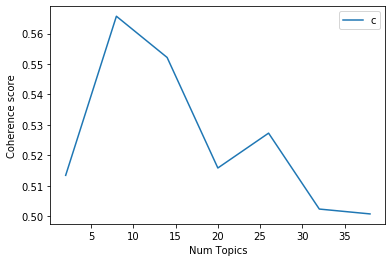

In [37]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5134
Num Topics = 8  has Coherence Value of 0.5657
Num Topics = 14  has Coherence Value of 0.5522
Num Topics = 20  has Coherence Value of 0.5159
Num Topics = 26  has Coherence Value of 0.5273
Num Topics = 32  has Coherence Value of 0.5024
Num Topics = 38  has Coherence Value of 0.5008


In [39]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.170*"phone" + 0.059*"product" + 0.042*"heat" + 0.033*"company" + '
  '0.032*"hai" + 0.019*"plz" + 0.015*"ho" + 0.015*"bill" + 0.012*"hang" + '
  '0.011*"ka"'),
 (1,
  '0.109*"hour" + 0.098*"charger" + 0.077*"day" + 0.071*"charge" + 0.070*"%" + '
  '0.057*"turbo" + 0.053*"battery" + 0.053*"charging" + 0.049*"usage" + '
  '0.043*"hr"'),
 (2,
  '0.250*"price" + 0.149*"phone" + 0.116*"performance" + 0.106*"range" + '
  '0.092*"camera" + 0.038*"smartphone" + 0.031*"feature" + 0.015*"segment" + '
  '0.014*"gud" + 0.011*"quality"'),
 (3,
  '0.281*"camera" + 0.279*"quality" + 0.060*"sound" + 0.042*"picture" + '
  '0.041*"mark" + 0.033*"performance" + 0.032*"clarity" + 0.019*"pic" + '
  '0.018*"mp" + 0.017*"rear"'),
 (4,
  '0.080*"mode" + 0.056*"game" + 0.053*"speaker" + 0.051*"video" + '
  '0.044*"depth" + 0.039*"photo" + 0.033*"light" + 0.032*"effect" + '
  '0.029*"music" + 0.026*"apps"'),
 (5,
  '0.074*"processor" + 0.053*"ram" + 0.038*"display" + 0.038*"front" + '
  '0.035*"card" 

# Finding the dominant topic

In [51]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)


In [52]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.0673,"lenovo, issue, update, software, device, syste...",good but need updates and improvements
1,1,1.0,0.0769,"hour, charger, day, charge, %, turbo, battery,...","worst mobile i have bought ever, battery is dr..."
2,2,0.0,0.0673,"phone, product, heat, company, hai, plz, ho, b...",when i will get my 10% cash back.... its alrea...
3,3,19.0,0.0648,"amazon, service, customer, replacement, return...",good
4,4,8.0,0.0673,"mobile, money, product, waste, superb, super, ...",the worst phone everthey have changed the last...
5,5,4.0,0.0660,"mode, game, speaker, video, depth, photo, ligh...",only i'm telling don't buyi'm totally disappoi...
6,6,13.0,0.0716,"battery, camera, phone, life, day, expectation...","phone is awesome. but while charging, it heats..."
7,7,12.0,0.0948,"problem, heating, phone, product, mobile, issu...",the battery level has worn down
8,8,5.0,0.0710,"processor, ram, display, front, card, memory, ...",it's over hitting problems...and phone hanging...
9,9,17.0,0.0599,"product, mobile, experience, delivery, speaker...",a lot of glitches dont buy this thing better g...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df_dominant_topic['Text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [54]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [55]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [56]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [57]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,good,3183.8,phone,1153.0,it,2122.1,not,1698.8,the,2815.7,is,2709.8,'t,755.7,.,2175.2,is,2340.0,.,2344.5
1,nice,1427.1,this,875.6,.,1741.1,working,1090.9,i,2087.6,battery,1775.7,buy,717.7,i,1771.5,.,1641.5,is,927.9
2,.,1110.6,best,873.2,is,934.5,is,1048.8,.,1883.7,very,1621.8,don,663.2,note,1208.2,camera,1598.9,",",926.4
3,phone,1103.9,..,781.9,'s,915.6,.,606.1,to,1735.5,not,1292.5,money,559.2,lenovo,1187.2,",",1582.3,not,813.9
4,very,1070.7,price,757.0,phone,901.1,problem,600.7,and,1311.7,good,1283.1,worst,501.8,this,953.2,the,1510.1,to,773.6
5,product,986.4,in,718.3,to,781.2,network,430.9,it,1126.9,camera,999.0,phone,448.6,k8,930.4,and,1076.3,the,754.8
6,mobile,536.4,awesome,488.5,a,755.4,mobile,418.2,phone,1066.3,bad,792.1,this,397.5,is,638.5,good,1037.4,battery,702.3
7,is,486.4,...,464.5,for,749.7,",",416.4,",",992.8,quality,666.7,waste,336.3,phone,580.6,not,882.6,in,608.8
8,and,327.4,for,390.1,this,739.1,properly,308.9,is,873.2,and,654.2,...,334.8,it,463.1,a,790.2,no,554.6
9,camera,307.8,the,375.5,and,570.9,sim,302.2,this,854.2,poor,593.0,mobile,324.8,with,444.3,to,700.9,and,525.6
